In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
games = pd.read_csv('./games.csv') # leer los datos

In [287]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [288]:
games.columns = games.columns.str.lower()  # Cambiando a minúsculas
print(games.info())
print()
print(games.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

                                            name platform  year_of_release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2

In [289]:
#print(games[['user_score','critic_score']].head(50))
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [290]:
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')  #cambiando los tipos de columna
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce').astype('float')

In [291]:
print(games.info())
print()
print(games.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None

       year_of_release      na_sales      eu_sales      jp_sales  \
count          16446.0  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std            5.8770

Se cambiaron las columnas de year of release a entero, porque no se manejan años con decimales y la columna User_score se cambió a float, debido a que estaba como Object.

In [292]:
data_nulos = games.isna().sum()  #verificamos valores ausentes
print(data_nulos)
print()
data_duplicado = games.duplicated().sum()
print('hay',data_duplicado, 'duplicados')

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

hay 0 duplicados


Elegir cómo tratar valores ausentes:

name: si no se sabe el nombre del juego, se puede cambiar a "nombre desconocido".  
year of release: para estos valores ausentes, podrían dejarse como NaN o sustituirse por un 0, no se pueden borrar porque pueden afectar las variables de las ventas.  
 
critic_score: Dejar NaN debido a que no se pueden borrar, es posible que no hayan recibido calificación  
user score: Dejar NaN debido a que no se pueden borrar, es posible que no hayan recibido calificación  
rating: No se pueden borrar, es posible que no hayan recibido calificación, entonces se pueden sustituir a: "sin calificar"  
  
Para estas últimas calificaciones, no es recomendable llenarlas con promedios. Si existe el texto TBD "to be determined" (ya revisado en el excel) en la columna user_score, )podría convertirse a NaN para manejar un solo valor ausente.

In [293]:
#sustituir year of release NaN por 0

games['year_of_release'] = games['year_of_release'].fillna(0)

In [294]:
#sustituimos valores de columnas que tienen otros valores
games['name'] = games['name'].fillna('desconocido')
games['genre'] = games['genre'].fillna('desconocido')

games['user_score'] = games['user_score'].replace('tbd', np.NaN)

games['rating'] = games['rating'].fillna('Sin clasificar')

In [295]:
games.isnull().sum()  #comprobamos que no hay valores nulos en las columnas adecuadas

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

In [296]:
print(games[games['user_score'] == 'tbd']) #validar que no hay valores tbd

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [297]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) # sumar ventas totales por región e incluir ventas totales



In [298]:
# Verificar la tabla de sumas
print(games[['name', 'year_of_release', 'total_sales']].head(10))

                        name  year_of_release  total_sales
0                 Wii Sports             2006        82.54
1          Super Mario Bros.             1985        40.24
2             Mario Kart Wii             2008        35.52
3          Wii Sports Resort             2009        32.77
4   Pokemon Red/Pokemon Blue             1996        31.38
5                     Tetris             1989        30.26
6      New Super Mario Bros.             2006        29.80
7                   Wii Play             2006        28.91
8  New Super Mario Bros. Wii             2009        28.32
9                  Duck Hunt             1984        28.31


In [299]:
#cant_juegos_per = games.groupby('year_of_release')['name'].count().reset_index() # ver juegos lanzados por año 

cant_juegos_per = games.groupby('year_of_release').agg( total_ventas=('total_sales', 'sum'), cantidad_de_juegos=('name', 'count')).reset_index()

cant_juegos_per.columns = ['año', 'total_ventas', 'cantidad_de_juegos']

cant_juegos_fin = cant_juegos_per.query('año != 0')# Imprime los juegos lanzados por año
cant_juegos_fin


C:\Users\isaacfraustro\AppData\Local\Temp\ipykernel_13296\1736136782.py:7: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  cant_juegos_fin = cant_juegos_per.query('año != 0')# Imprime los juegos lanzados por año


,año,total_ventas,cantidad_de_juegos
1,1980,11.38,9
2,1981,35.68,46
3,1982,28.88,36
4,1983,16.80,17
5,1984,50.35,14
6,1985,53.95,14
7,1986,37.08,21
8,1987,21.70,16
9,1988,47.21,15
10,1989,73.45,17


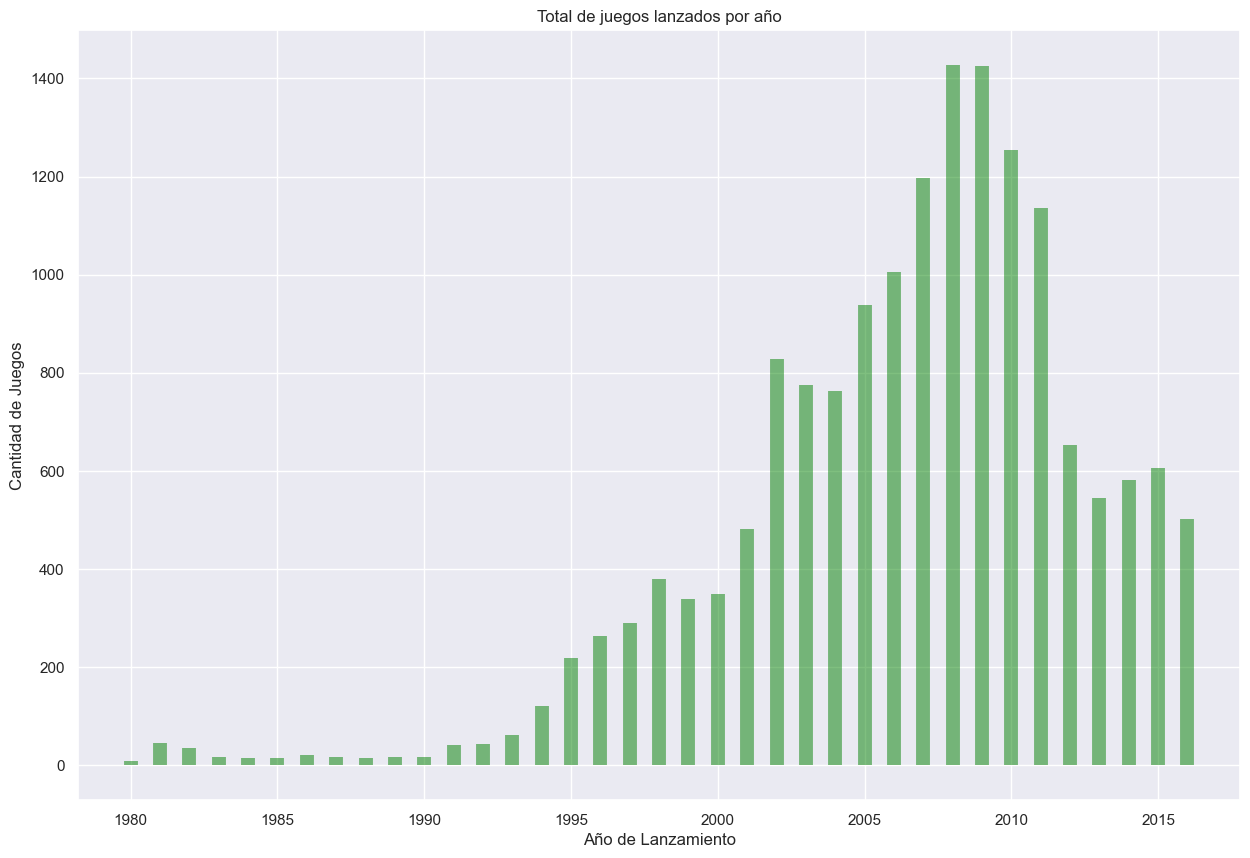

In [300]:
plt.vlines(x=cant_juegos_fin.año, ymin=0, ymax= cant_juegos_fin.cantidad_de_juegos, alpha=0.5, linewidth = 10, colors= 'green') # graficar lo anterior, solo # de juegos
plt.title('Total de juegos lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')

plt.show()

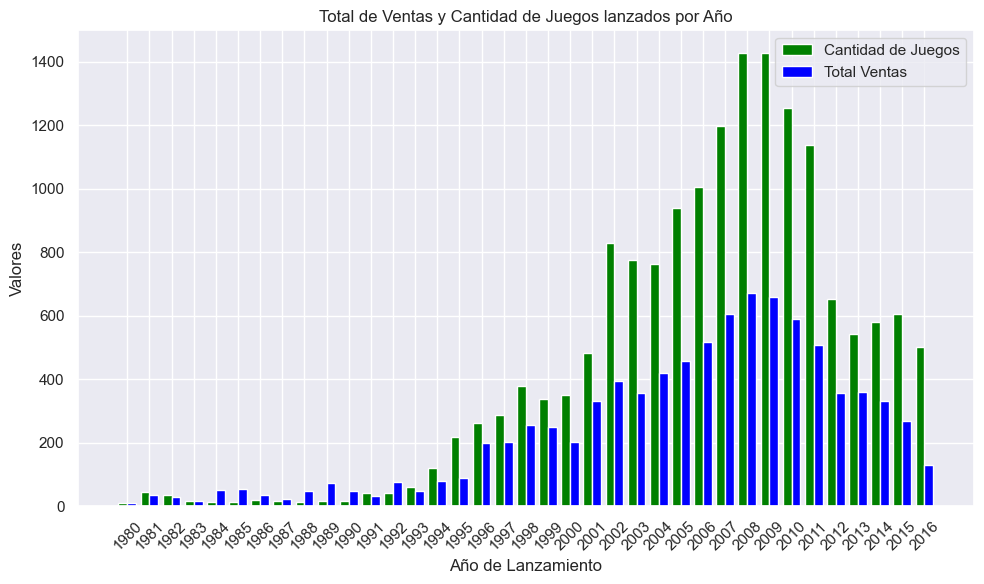

In [301]:
#Graficar ambas variables, # de juegos y Total de ventas.

years = np.arange(len(cant_juegos_fin['año']))  # Crear posiciones para el eje X (años)

bar_width = 0.4

# Crear un gráfico con barras para ambas variables
plt.figure(figsize=(10, 6))

# Graficar la primera variable: cantidad de juegos
plt.bar(years - bar_width/2, cant_juegos_fin['cantidad_de_juegos'], width=bar_width, label='Cantidad de Juegos', color='green')

# Graficar la segunda variable: total de ventas
plt.bar(years + bar_width/2, cant_juegos_fin['total_ventas'], width=bar_width, label='Total Ventas', color='blue')

# Añadir etiquetas y título
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Valores')
plt.title('Total de Ventas y Cantidad de Juegos lanzados por Año')

# Añadir las etiquetas de los años en el eje X
plt.xticks(years, cant_juegos_fin['año'], rotation=45)

# Mostrar leyenda
plt.legend()

# Ajustar el diseño
plt.tight_layout()

In [423]:
#Sacar data de PS2 y graficarlo
ps2_games = games[games['platform'] == 'PS2']

ps2_games = ps2_games.query('year_of_release != 0').reset_index()

print(ps2_games)


      index                                              name platform  \
0        17                     Grand Theft Auto: San Andreas      PS2   
1        24                       Grand Theft Auto: Vice City      PS2   
2        28                            Gran Turismo 3: A-Spec      PS2   
3        38                              Grand Theft Auto III      PS2   
4        48                                    Gran Turismo 4      PS2   
...     ...                                               ...      ...   
2122  16670      Sugar + Spice! Anoko no Suteki na Nanimokamo      PS2   
2123  16671                                    Kanokon: Esuii      PS2   
2124  16683                  Scarlett: Nichijou no Kyoukaisen      PS2   
2125  16689                                         Real Rode      PS2   
2126  16709  SCORE International Baja 1000: The Official Game      PS2   

      year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
0                2004     Action

C:\Users\isaacfraustro\AppData\Local\Temp\ipykernel_13296\1691784492.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  ps2_games = ps2_games.query('year_of_release != 0').reset_index()


    year_of_release  total_ventas  cantidad_de_juegos
0              2000         39.17                  82
1              2001        166.43                 185
2              2002        205.38                 280
3              2003        184.31                 256
4              2004        211.81                 259
5              2005        160.66                 260
6              2006        103.42                 259
7              2007         75.99                 214
8              2008         53.90                 191
9              2009         26.40                  96
10             2010          5.64                  38
11             2011          0.45                   7



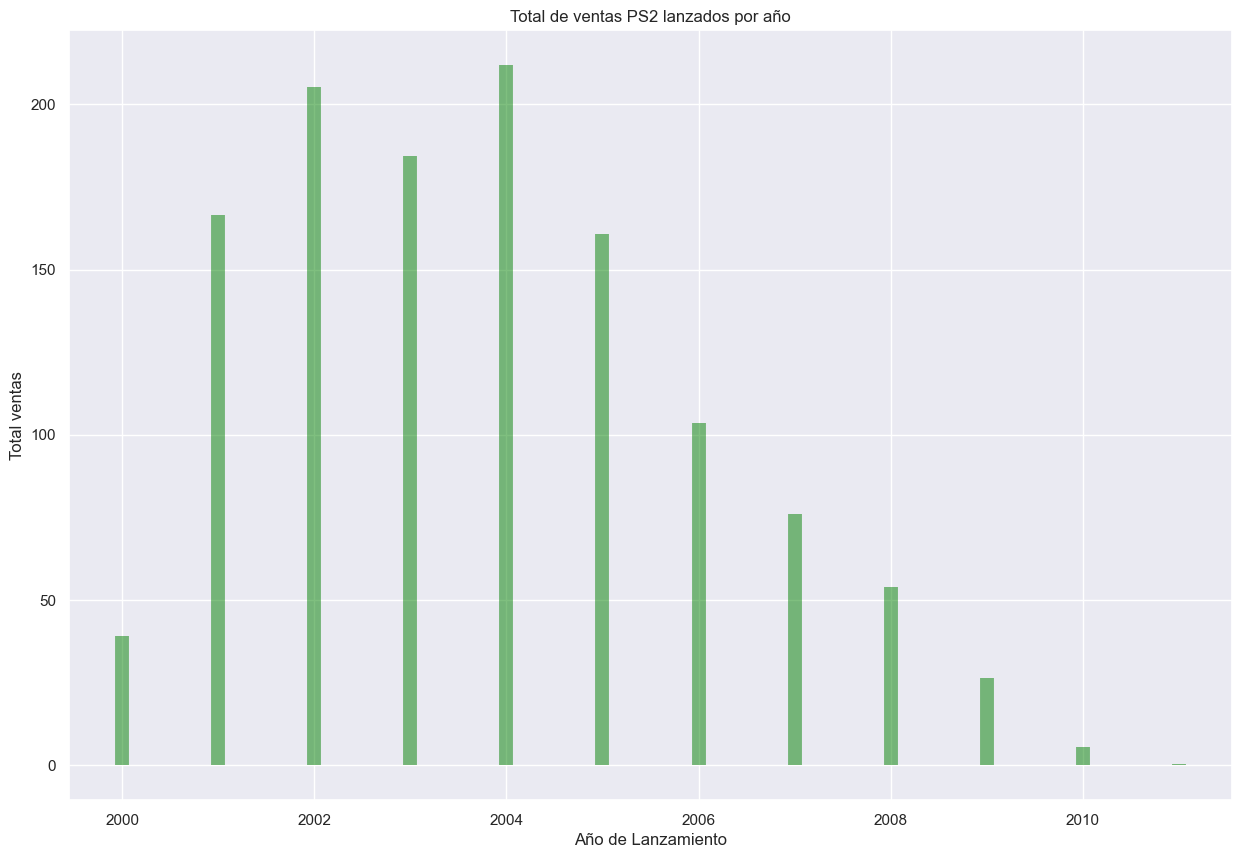

In [424]:
#imprimir gráfico ventas PS2
ventas_ps2 = ps2_games.groupby('year_of_release').agg( total_ventas=('total_sales', 'sum'), cantidad_de_juegos=('name', 'count')).reset_index()      # Contar el número de juegos total_ventas=('total_sales', 'sum')        # Sumar las ventas totales
print(ventas_ps2)

print()

plt.vlines(x=ventas_ps2.year_of_release, ymin=0, ymax= ventas_ps2.total_ventas, alpha=0.5, linewidth = 10, colors= 'green') # graficar lo anterior
plt.title('Total de ventas PS2 lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total ventas')
plt.show()

C:\Users\isaacfraustro\AppData\Local\Temp\ipykernel_13296\505662875.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  x360_games = x360_games.query('year_of_release != 0').reset_index()


    year_of_release  total_ventas  cantidad_de_juegos
0              2005          8.25                  18
1              2006         51.62                  93
2              2007         95.41                 123
3              2008        135.26                 146
4              2009        120.29                 172
5              2010        170.03                 182
6              2011        143.84                 206
7              2012         99.74                 106
8              2013         88.58                  75
9              2014         34.74                  63
10             2015         11.96                  35
11             2016          1.52                  13



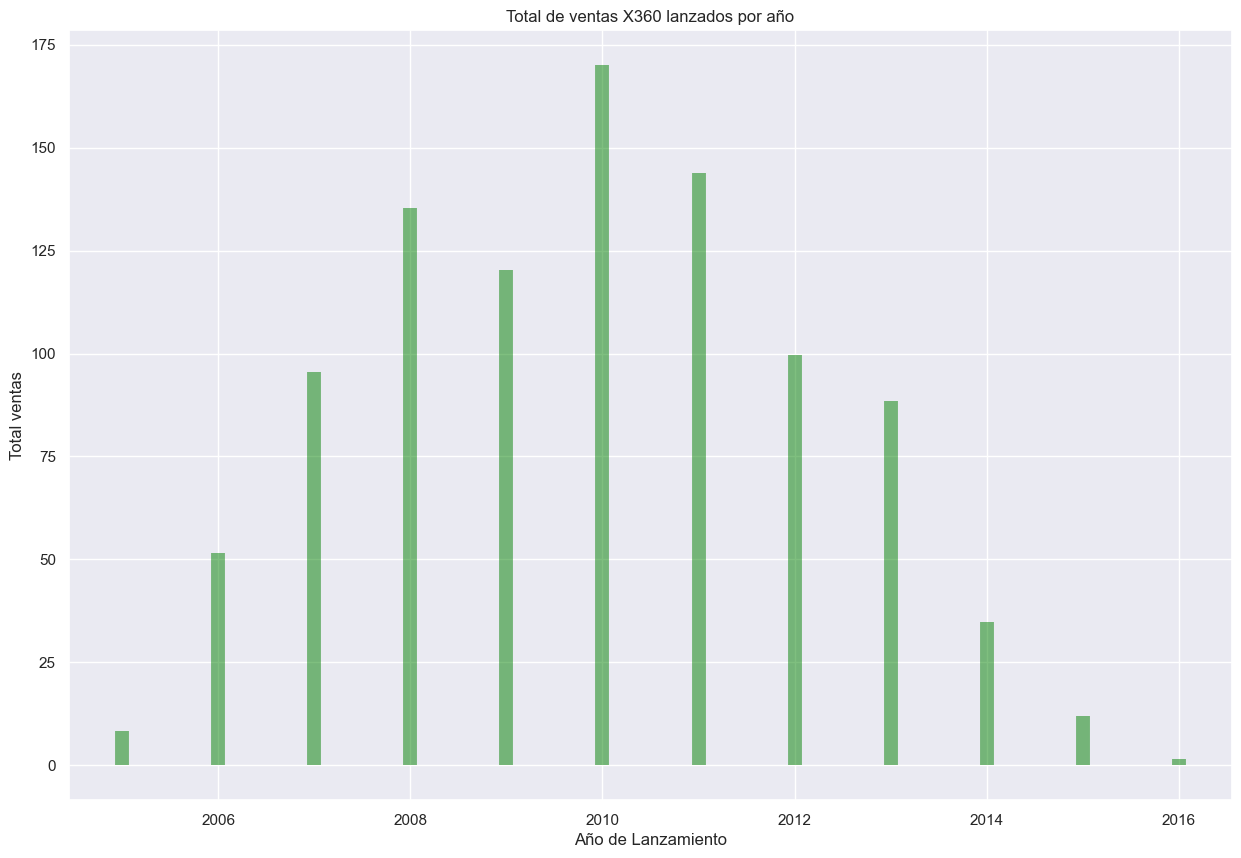

In [425]:
#Repetir para ventas X360
x360_games = games[games['platform'] == 'X360']

x360_games = x360_games.query('year_of_release != 0').reset_index()

ventas_x360 = x360_games.groupby('year_of_release').agg( total_ventas=('total_sales', 'sum'), cantidad_de_juegos=('name', 'count')).reset_index()      # Contar el número de juegos total_ventas=('total_sales', 'sum')        # Sumar las ventas totales
print(ventas_x360)

print()

plt.vlines(x=ventas_x360.year_of_release, ymin=0, ymax= ventas_x360.total_ventas, alpha=0.5, linewidth = 10, colors= 'green') # graficar lo anterior
plt.title('Total de ventas X360 lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total ventas')
plt.show()

C:\Users\isaacfraustro\AppData\Local\Temp\ipykernel_13296\2702486234.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  ps3_games = ps3_games.query('year_of_release != 0').reset_index()


    year_of_release  total_ventas  cantidad_de_juegos
0              2006         20.96                  27
1              2007         73.19                  90
2              2008        118.52                 138
3              2009        130.93                 162
4              2010        142.17                 181
5              2011        156.78                 215
6              2012        107.36                 148
7              2013        113.25                 126
8              2014         47.76                 108
9              2015         16.82                  73
10             2016          3.60                  38



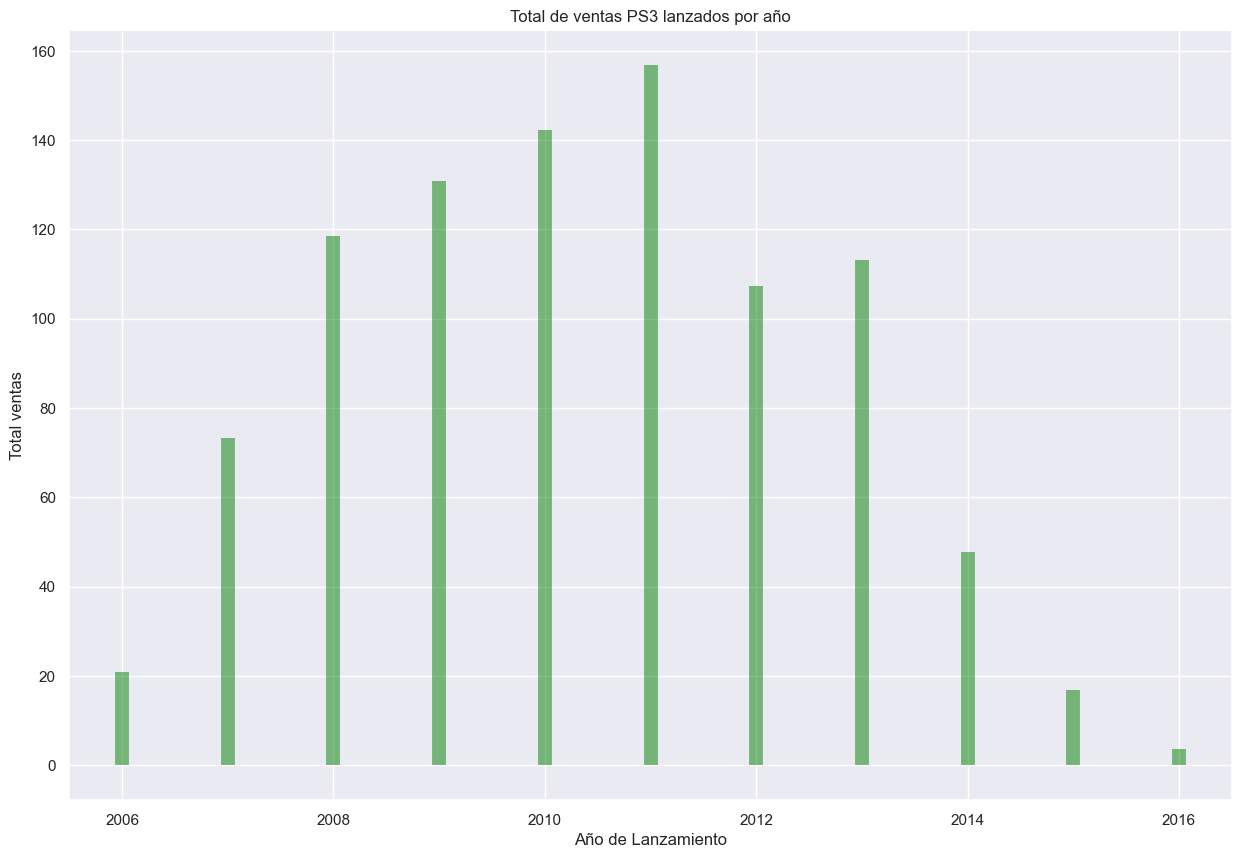

In [426]:
#Repetir para ventas PS3
ps3_games = games[games['platform'] == 'PS3']

ps3_games = ps3_games.query('year_of_release != 0').reset_index()

ventas_ps3 = ps3_games.groupby('year_of_release').agg( total_ventas=('total_sales', 'sum'), cantidad_de_juegos=('name', 'count')).reset_index()      # Contar el número de juegos total_ventas=('total_sales', 'sum')        # Sumar las ventas totales
print(ventas_ps3)

print()

plt.vlines(x=ventas_ps3.year_of_release, ymin=0, ymax= ventas_ps3.total_ventas, alpha=0.5, linewidth = 10, colors= 'green') # graficar lo anterior
plt.title('Total de ventas PS3 lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total ventas')
plt.show()

C:\Users\isaacfraustro\AppData\Local\Temp\ipykernel_13296\3578603132.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  wii_games = wii_games.query('year_of_release != 0').reset_index()


    year_of_release  total_ventas  cantidad_de_juegos
0              2006        137.15                  44
1              2007        152.77                 185
2              2008        171.32                 282
3              2009        206.97                 325
4              2010        127.95                 253
5              2011         59.65                 143
6              2012         21.71                  31
7              2013          8.59                  12
8              2014          3.75                   6
9              2015          1.14                   4
10             2016          0.18                   1



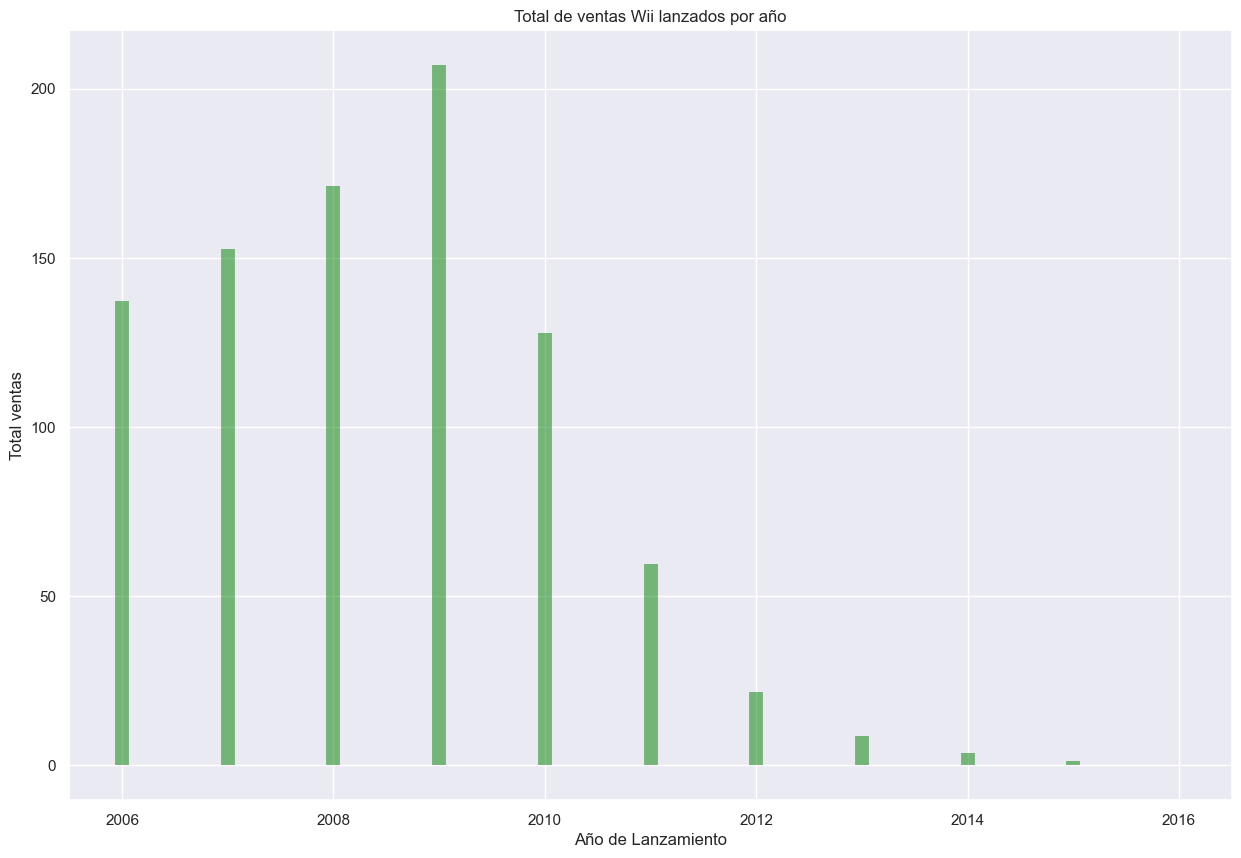

In [427]:
#Repetir para ventas Wii
wii_games = games[games['platform'] == 'Wii']

wii_games = wii_games.query('year_of_release != 0').reset_index()

ventas_wii = wii_games.groupby('year_of_release').agg( total_ventas=('total_sales', 'sum'), cantidad_de_juegos=('name', 'count')).reset_index()      # Contar el número de juegos total_ventas=('total_sales', 'sum')        # Sumar las ventas totales
print(ventas_wii)

print()

plt.vlines(x=ventas_wii.year_of_release, ymin=0, ymax= ventas_wii.total_ventas, alpha=0.5, linewidth = 10, colors= 'green') # graficar lo anterior
plt.title('Total de ventas Wii lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total ventas')
plt.show()

C:\Users\isaacfraustro\AppData\Local\Temp\ipykernel_13296\2258938834.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  ds_games = ds_games.query('year_of_release != 0').reset_index()


    year_of_release  total_ventas  cantidad_de_juegos
0              1985          0.02                   1
1              2004         17.27                  23
2              2005        130.14                 118
3              2006        119.81                 201
4              2007        146.94                 376
5              2008        145.31                 492
6              2009        119.54                 403
7              2010         85.02                 323
8              2011         26.18                 153
9              2012         11.01                  23
10             2013          1.54                   8



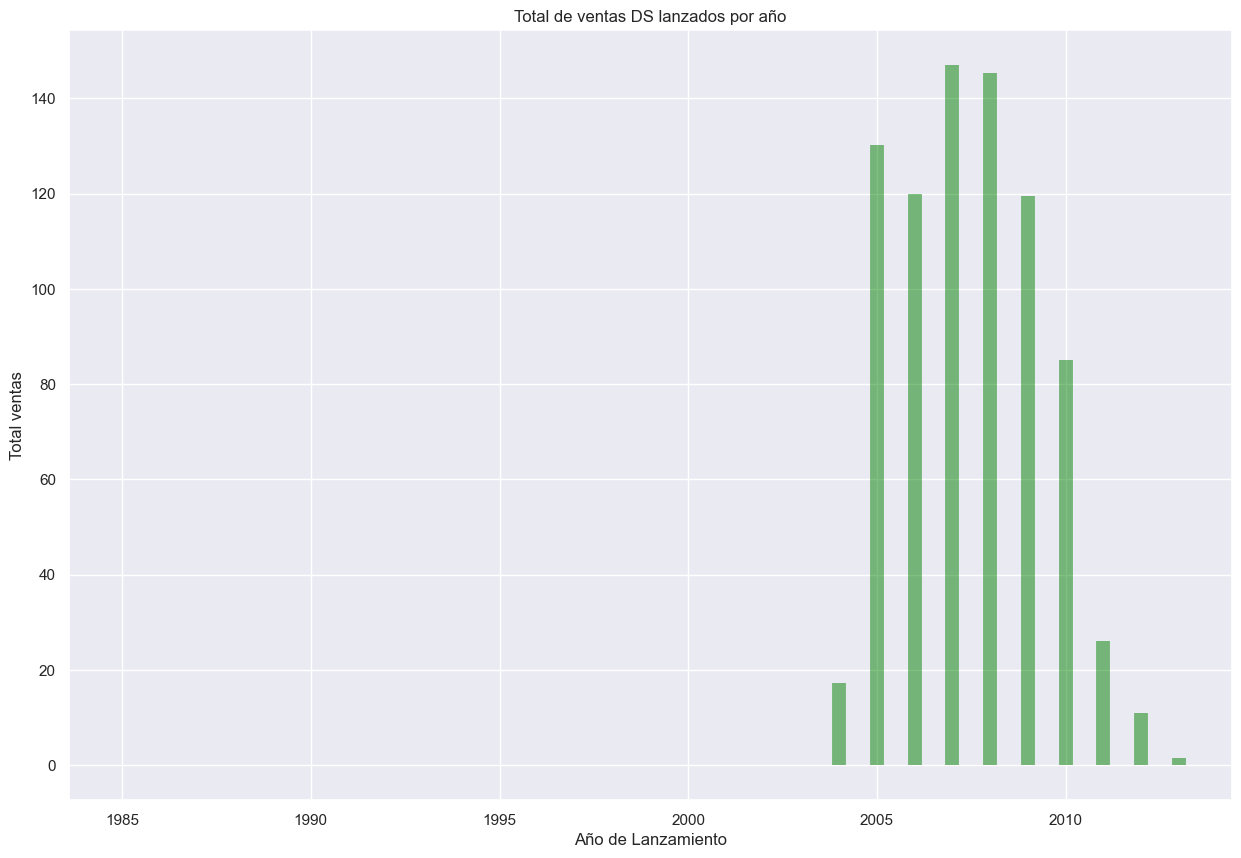

In [428]:
#Repetir para ventas DS
ds_games = games[games['platform'] == 'DS']

ds_games = ds_games.query('year_of_release != 0').reset_index()

ventas_ds = ds_games.groupby('year_of_release').agg( total_ventas=('total_sales', 'sum'), cantidad_de_juegos=('name', 'count')).reset_index()      # Contar el número de juegos total_ventas=('total_sales', 'sum')        # Sumar las ventas totales
print(ventas_ds)

print()

plt.vlines(x=ventas_ds.year_of_release, ymin=0, ymax= ventas_ds.total_ventas, alpha=0.5, linewidth = 10, colors= 'green') # graficar lo anterior
plt.title('Total de ventas DS lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total ventas')
plt.show()

C:\Users\isaacfraustro\AppData\Local\Temp\ipykernel_13296\3261172996.py:6: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  top_games = top_games.query('year_of_release !=0')


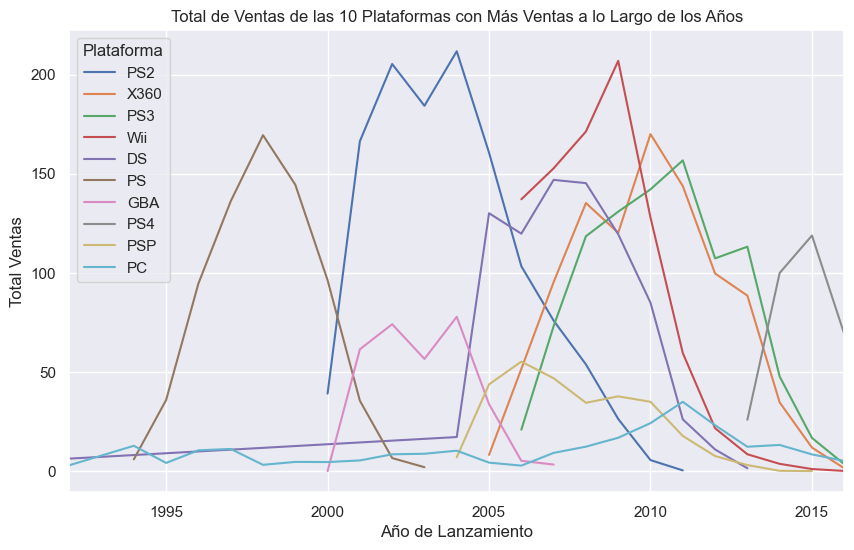

In [429]:
# Identificar las 5 plataformas con más ventas
top_platforms = games.groupby('platform')['total_sales'].sum().nlargest(10).index

# Filtrar los datos para solo incluir las plataformas con más ventas
top_games = games[games['platform'].isin(top_platforms)]
top_games = top_games.query('year_of_release !=0')

# Agrupar por año y plataforma para obtener las ventas y cantidad de juegos
ventas_top_plat = top_games.groupby(['year_of_release', 'platform']).agg(
    total_ventas=('total_sales', 'sum'),
    cantidad_de_juegos=('name', 'count')
).reset_index()

# Graficar el comportamiento de las 5 plataformas
plt.figure(figsize=(10, 6))

# Iterar sobre cada plataforma y graficar su comportamiento
for platform in top_platforms:
    plataforma_data = ventas_top_plat[ventas_top_plat['platform'] == platform]
    plt.plot(plataforma_data['year_of_release'], plataforma_data['total_ventas'], label=platform)

# Añadir título y etiquetas a los ejes
plt.title('Total de Ventas de las 10 Plataformas con Más Ventas a lo Largo de los Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total Ventas')
plt.legend(title='Plataforma')
plt.xlim(1992, 2016)
plt.grid(True)
plt.show()

In [430]:
platform_sales= games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
print(platform_sales)

   platform  total_sales
0       PS2      1255.77
1      X360       971.42
2       PS3       939.65
3       Wii       907.51
4        DS       806.12
5        PS       730.86
6       GBA       317.85
7       PS4       314.14
8       PSP       294.05
9        PC       259.52
10      3DS       259.00
11       XB       257.74
12       GB       255.46
13      NES       251.05
14      N64       218.68
15     SNES       200.04
16       GC       198.93
17     XOne       159.32
18     2600        96.98
19     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
22      GEN        30.77
23       DC        15.95
24      SCD         1.86
25       NG         1.44
26       WS         1.42
27     TG16         0.16
28      3DO         0.10
29       GG         0.04
30     PCFX         0.03


In [431]:
platform_sales['z_score'] = (platform_sales['total_sales'] - platform_sales['total_sales'].mean())/ platform_sales['total_sales'].std()

Markdown

In [432]:
print(platform_sales['z_score'])

0     2.780807
1     1.964085
2     1.872834
3     1.780520
4     1.489304
5     1.273139
6     0.086875
7     0.076219
8     0.018516
9    -0.080663
10   -0.082156
11   -0.085775
12   -0.092324
13   -0.104991
14   -0.197965
15   -0.251504
16   -0.254692
17   -0.368461
18   -0.547517
19   -0.589997
20   -0.670765
21   -0.729588
22   -0.737688
23   -0.780254
24   -0.820724
25   -0.821931
26   -0.821988
27   -0.825607
28   -0.825779
29   -0.825952
30   -0.825980
Name: z_score, dtype: float64


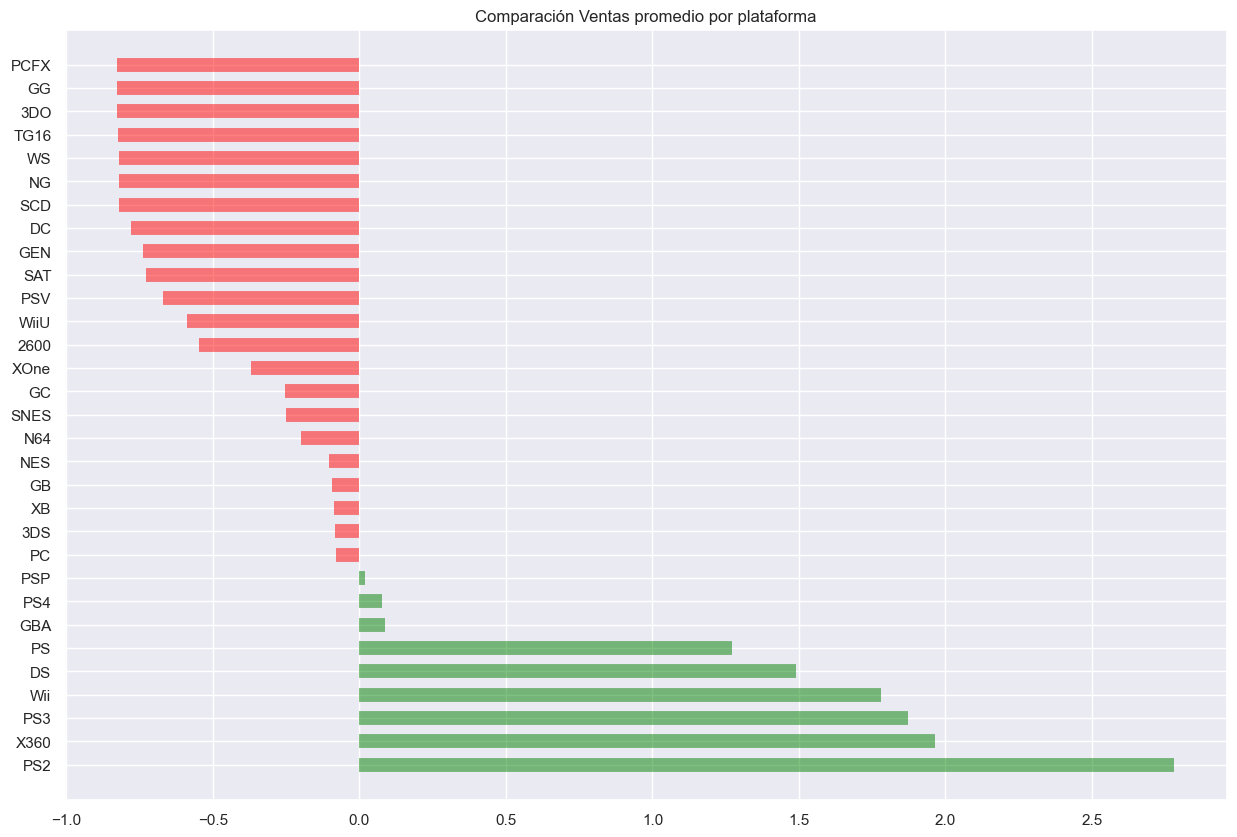

In [433]:
platform_sales['color'] = ['red' if puntaje <=0 else 'green' for puntaje in platform_sales['z_score']]

plt.hlines(
    y= platform_sales.platform,
    xmin=0,
    xmax= platform_sales.z_score,
    color= platform_sales.color,
    linewidth = 10,
    alpha=0.5
)
plt.title('Comparación Ventas promedio por plataforma')
plt.show()


In [434]:
games2 = games[games['year_of_release']  >= 2009]  #filtrar datos desde 2008 en adelante

lifetime_plataformas = pd.pivot_table(
    games2,
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)

lifetime_plataformas = lifetime_plataformas.query('year_of_release> 0 ')

print(lifetime_plataformas)

platform           3DS      DS     PC    PS2     PS3     PS4    PSP    PSV  \
year_of_release                                                              
2009              0.00  119.54  16.91  26.40  130.93    0.00  37.78   0.00   
2010              0.00   85.02  24.28   5.64  142.17    0.00  35.04   0.00   
2011             63.20   26.18  35.03   0.45  156.78    0.00  17.82   4.63   
2012             51.36   11.01  23.22   0.00  107.36    0.00   7.69  16.19   
2013             56.57    1.54  12.38   0.00  113.25   25.99   3.14  10.59   
2014             43.76    0.00  13.28   0.00   47.76  100.00   0.24  11.90   
2015             27.78    0.00   8.52   0.00   16.82  118.90   0.12   6.25   
2016             15.14    0.00   5.25   0.00    3.60   69.25   0.00   4.25   

platform            Wii   WiiU    X360   XOne  
year_of_release                                
2009             206.97   0.00  120.29   0.00  
2010             127.95   0.00  170.03   0.00  
2011              59.65   0

C:\Users\isaacfraustro\AppData\Local\Temp\ipykernel_13296\1510805924.py:11: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  lifetime_plataformas = lifetime_plataformas.query('year_of_release> 0 ')


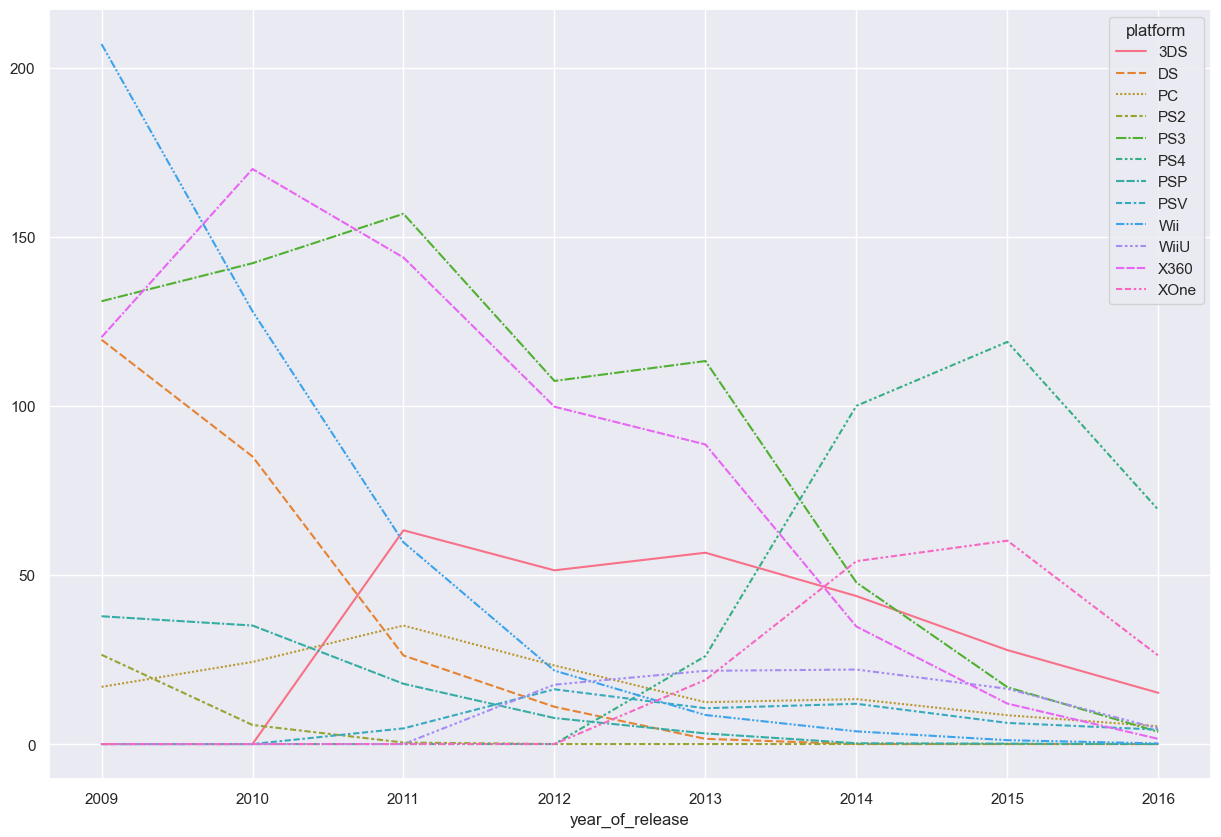

In [435]:
sns.lineplot(data=lifetime_plataformas)  #aquí podemos ver a las últimas ventas de plataformas vigentes hasta 2016
plt.show()

In [436]:
datosboxplot = games2.groupby(['year_of_release', 'platform']).agg({'total_sales': 'sum'}).reset_index()

In [437]:
datosboxplot

,year_of_release,platform,total_sales
0,2009,DS,119.54
1,2009,PC,16.91
2,2009,PS2,26.40
3,2009,PS3,130.93
4,2009,PSP,37.78
...,...,...,...
67,2016,PSV,4.25
68,2016,Wii,0.18
69,2016,WiiU,4.60
70,2016,X360,1.52


<Axes: xlabel='platform', ylabel='total_sales'>

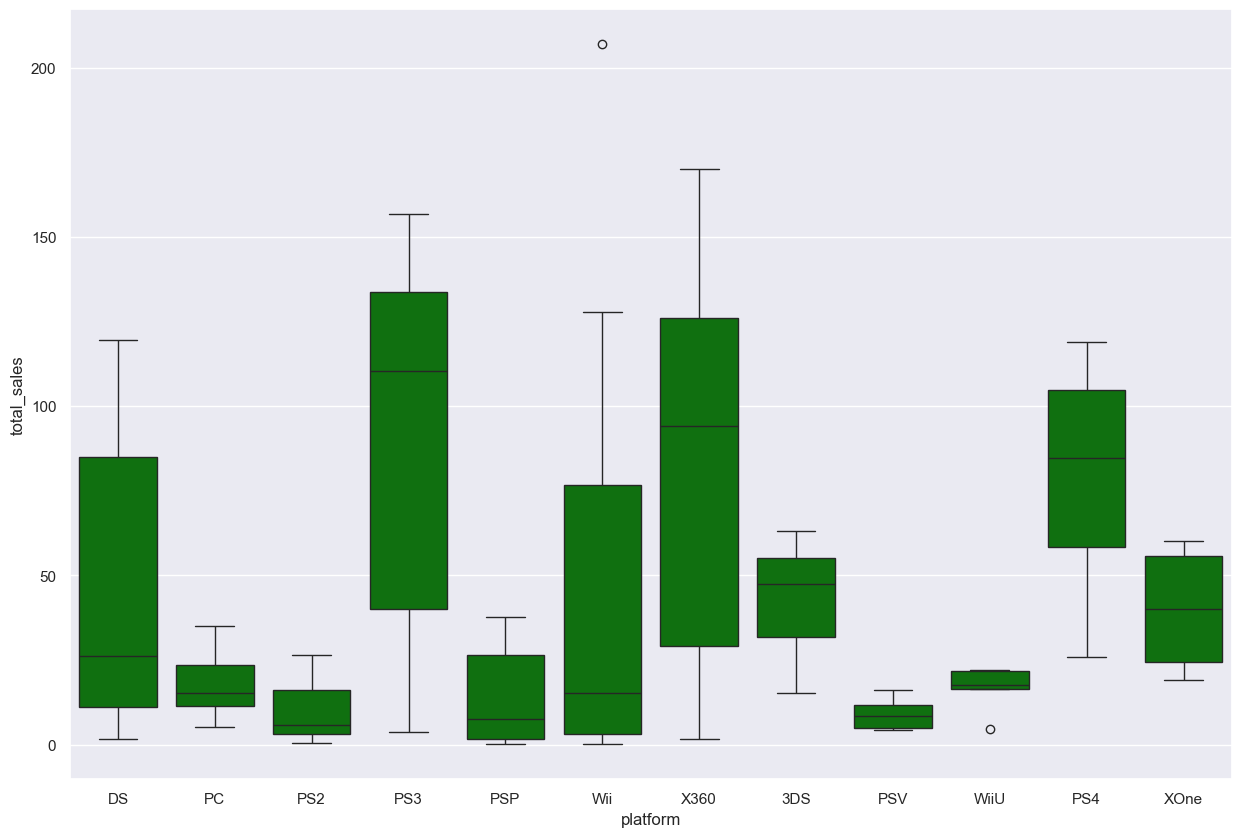

In [438]:
sns.boxplot(x='platform', y='total_sales', data = datosboxplot, color= 'green')

conclusiones casi todo punto 3 copypaste

In [439]:
#validar correlación entre la crítica y las ventas

ps4_games = games.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum().query('platform== "PS4" & critic_score > 0 & user_score >0')

correlación de veentas vs puntaje de crítica para PS4: 0.4058948014583666



<Axes: xlabel='critic_score', ylabel='total_sales'>

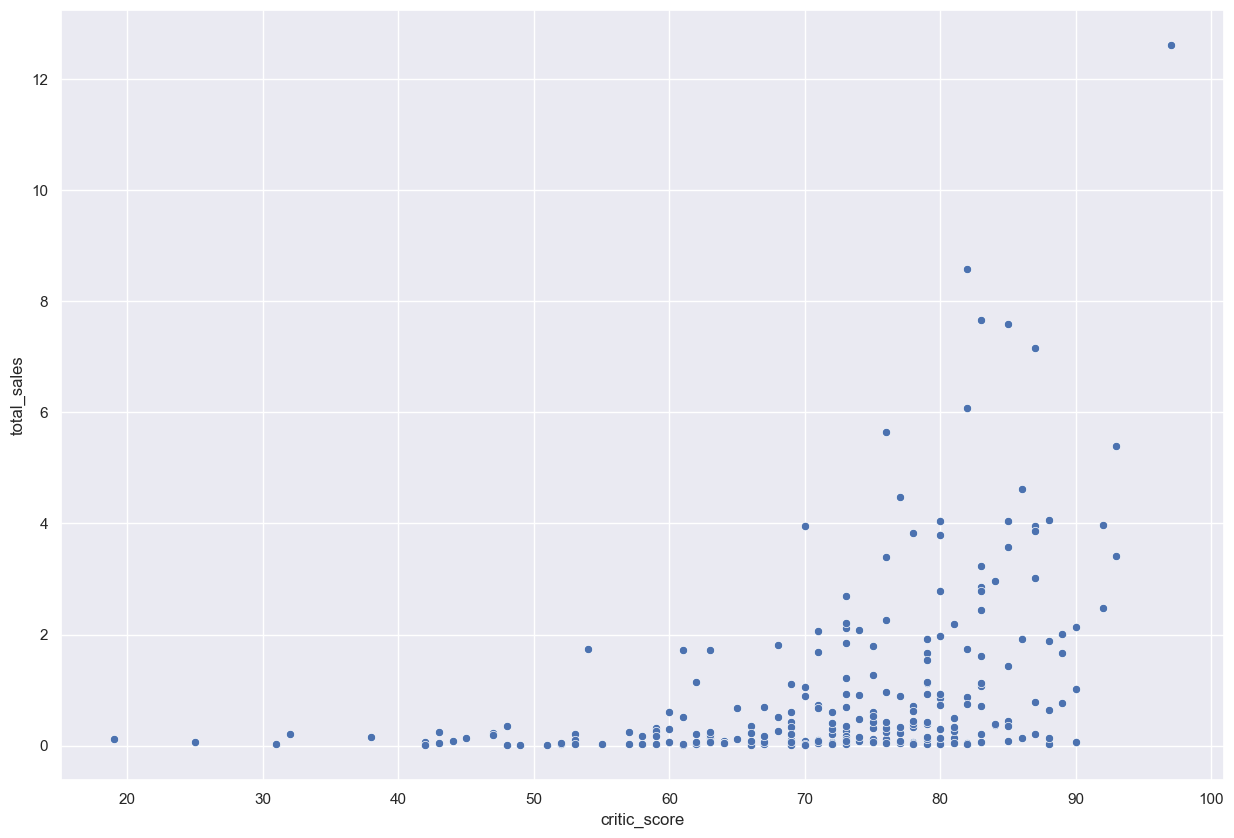

In [440]:
ps4_corr = ps4_games['total_sales'].corr(ps4_games['critic_score'])
print('correlación de veentas vs puntaje de crítica para PS4:', ps4_corr)
print()
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_games)

correlación de ventas vs puntaje de usuario para PS4: -0.03362497596528893



<Axes: xlabel='critic_score', ylabel='total_sales'>

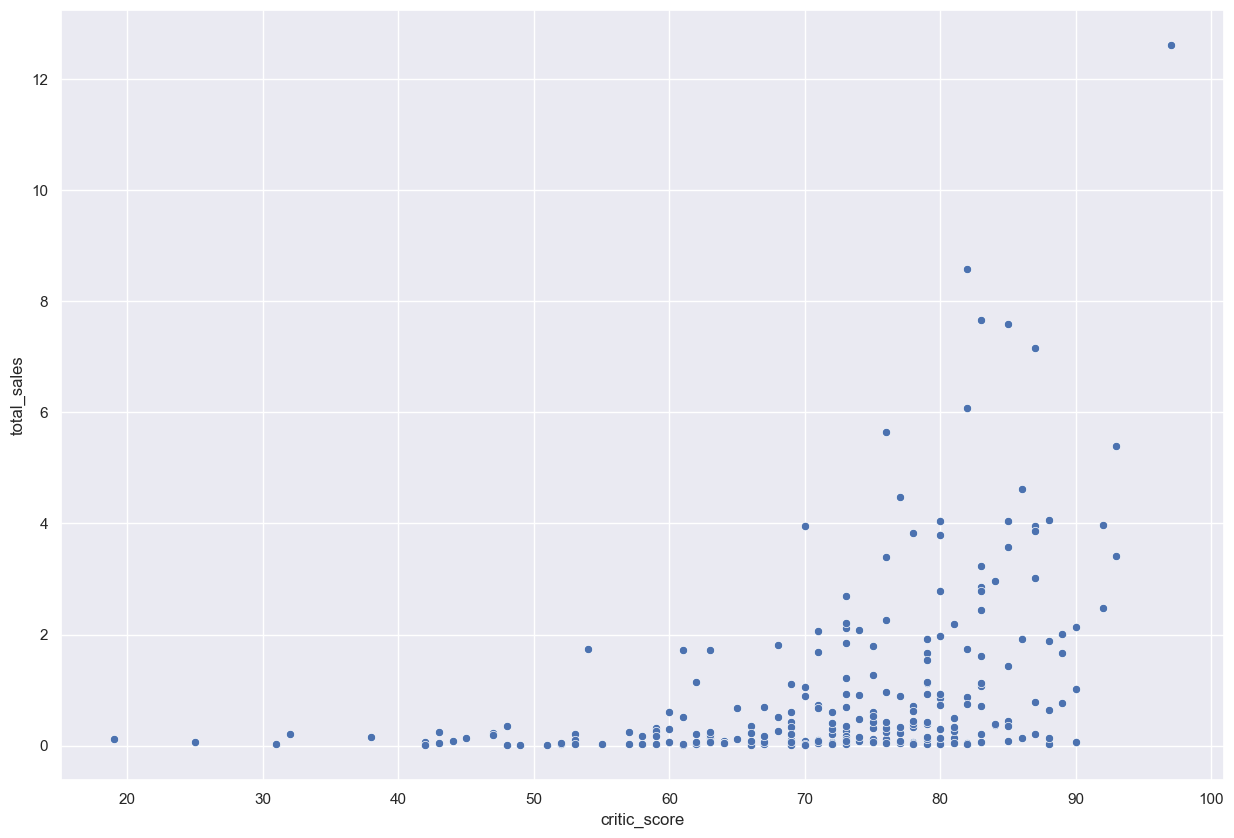

In [441]:
ps4_corr_user = ps4_games['total_sales'].corr(ps4_games['user_score'])  # validar misma correlación de ventas con el user score
print('correlación de ventas vs puntaje de usuario para PS4:', ps4_corr_user)
print()
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_games)

Se ve una mayor correlación (no tan alta) de las ventas con el puntaje de la crítica. No se observa correlación alguna con el puntaje del usuario.

In [442]:
# función para ver correlación con las top plataformas.
def correlacion(plataforma):
    data = games2[games2['platform'] == plataforma]

    corr = data[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']
    data.plot(y='total_sales', x='critic_score', kind='scatter', grid=True)
    plt.title(plataforma)

    data.plot(y='total_sales', x='user_score', kind='scatter', grid=True)
    plt.title(plataforma)

    print(plataforma, corr)
    print('------')


PS4 critic_score    0.406568
user_score     -0.031957
total_sales     1.000000
Name: total_sales, dtype: float64
------
WiiU critic_score    0.348380
user_score      0.400219
total_sales     1.000000
Name: total_sales, dtype: float64
------
PS3 critic_score    0.417976
user_score      0.095400
total_sales     1.000000
Name: total_sales, dtype: float64
------
X360 critic_score    0.363933
user_score      0.083108
total_sales     1.000000
Name: total_sales, dtype: float64
------
Wii critic_score    0.222653
user_score      0.118793
total_sales     1.000000
Name: total_sales, dtype: float64
------


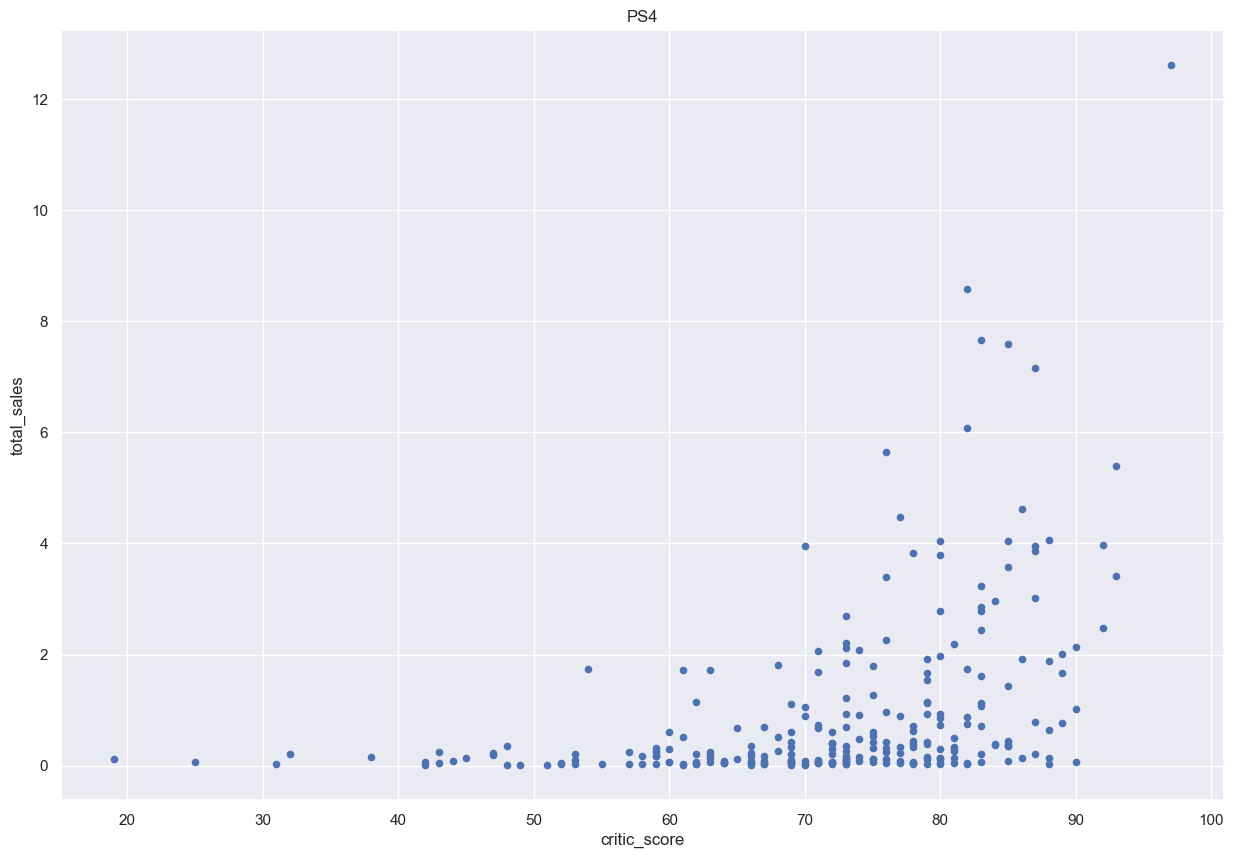

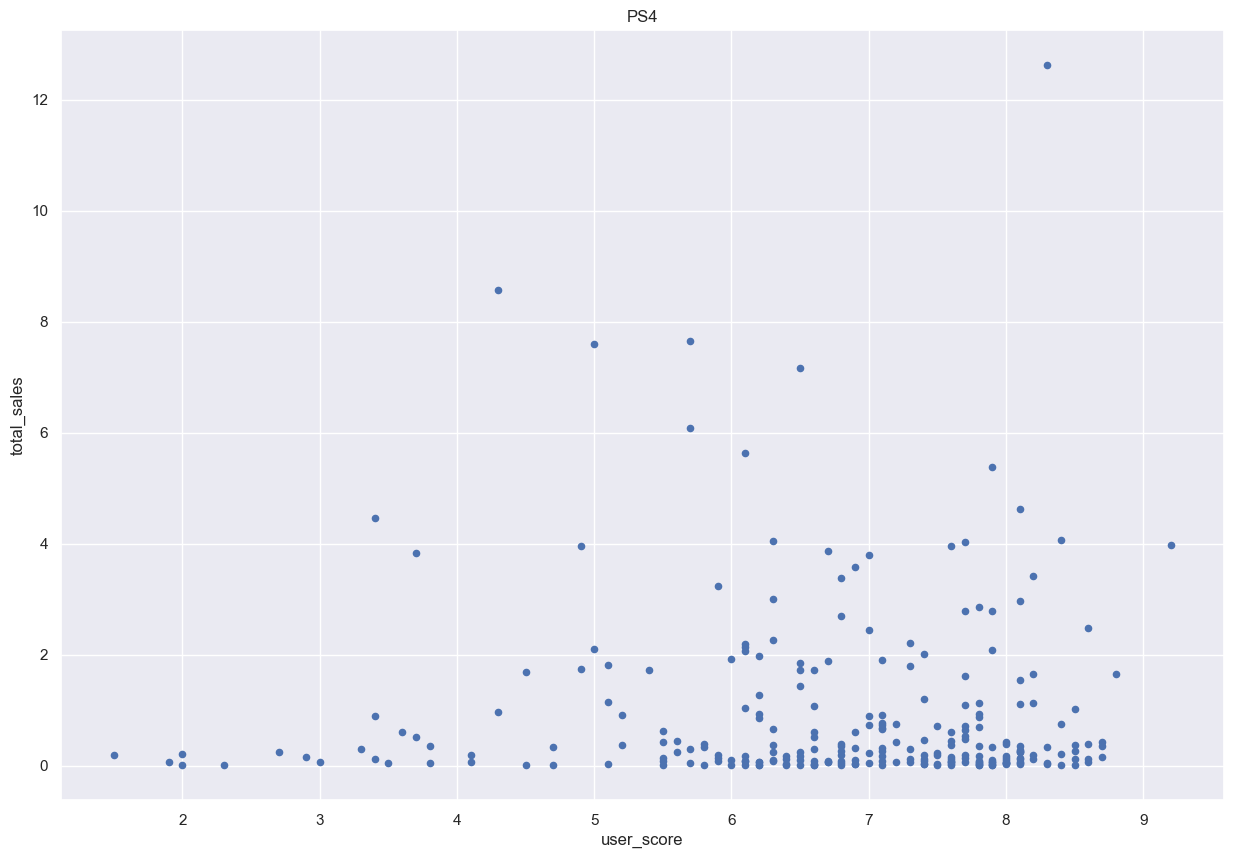

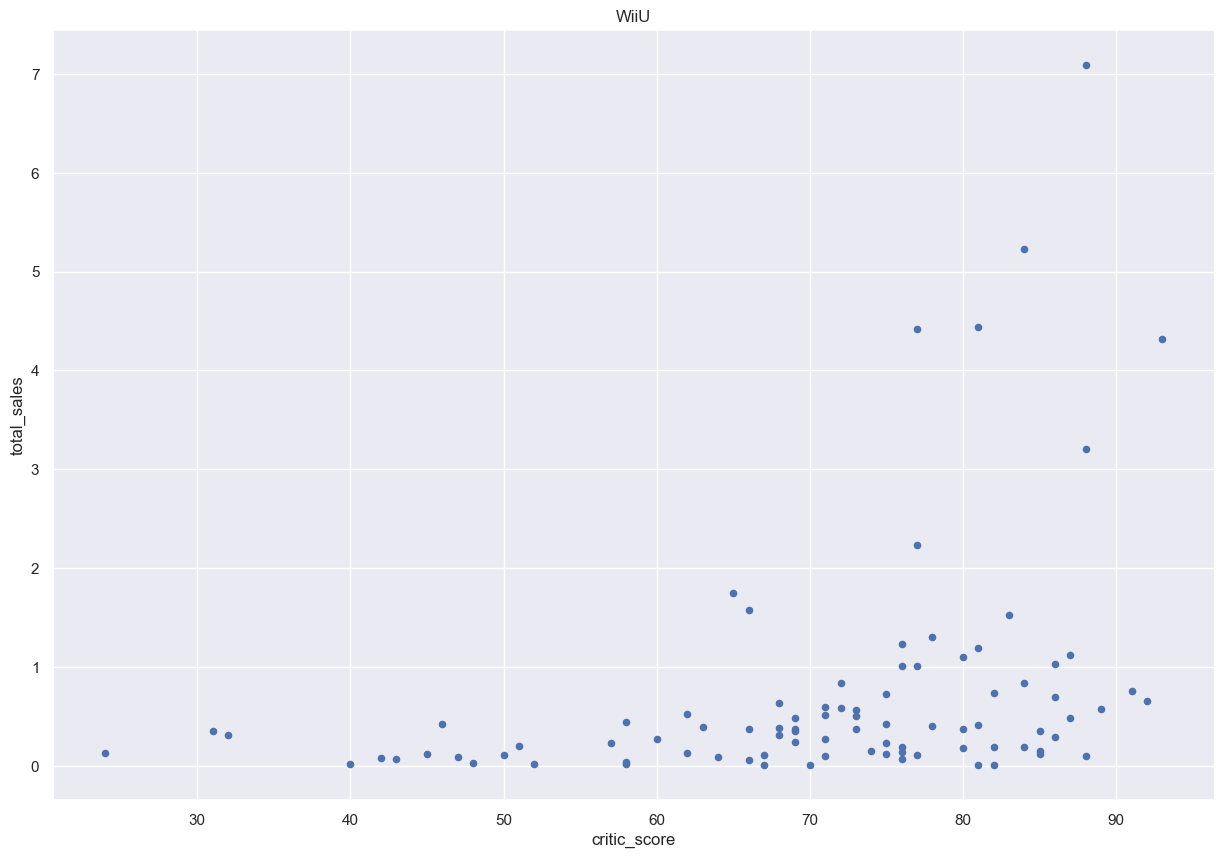

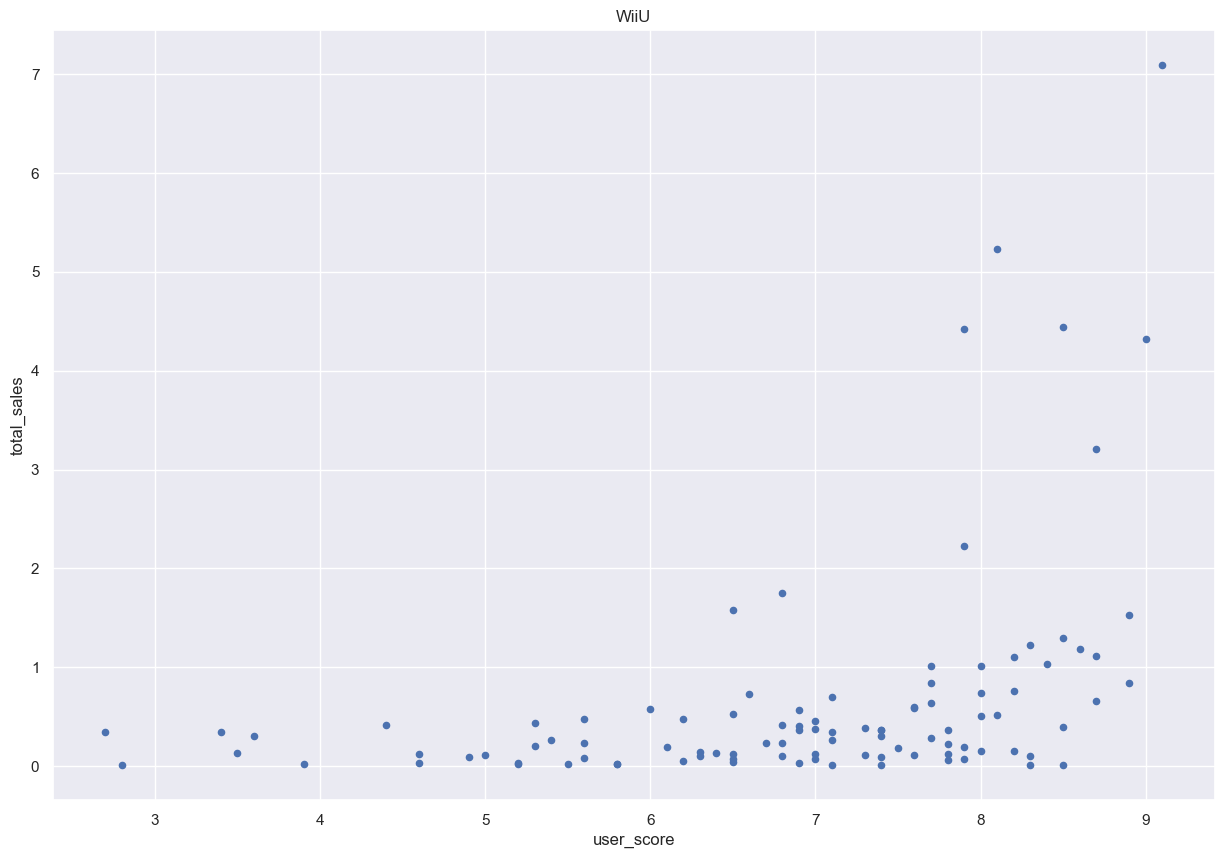

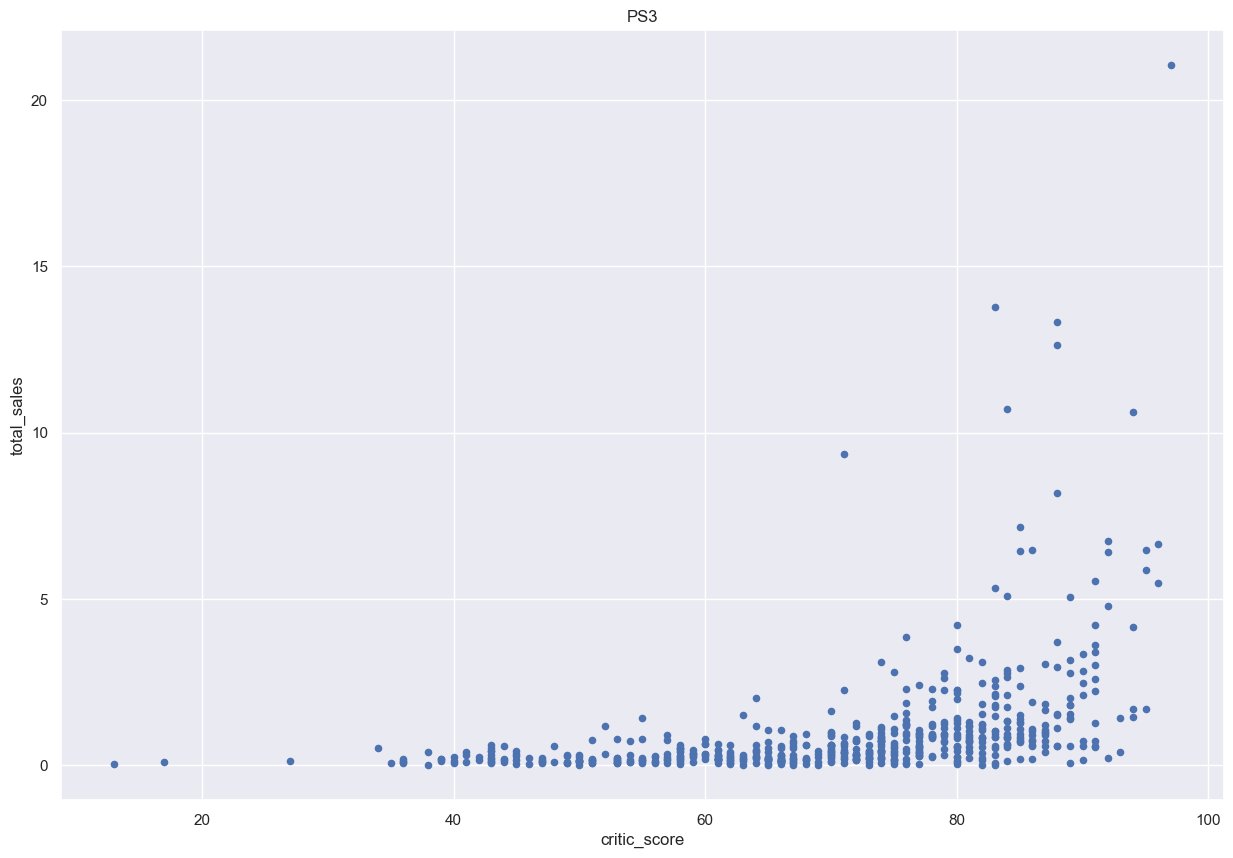

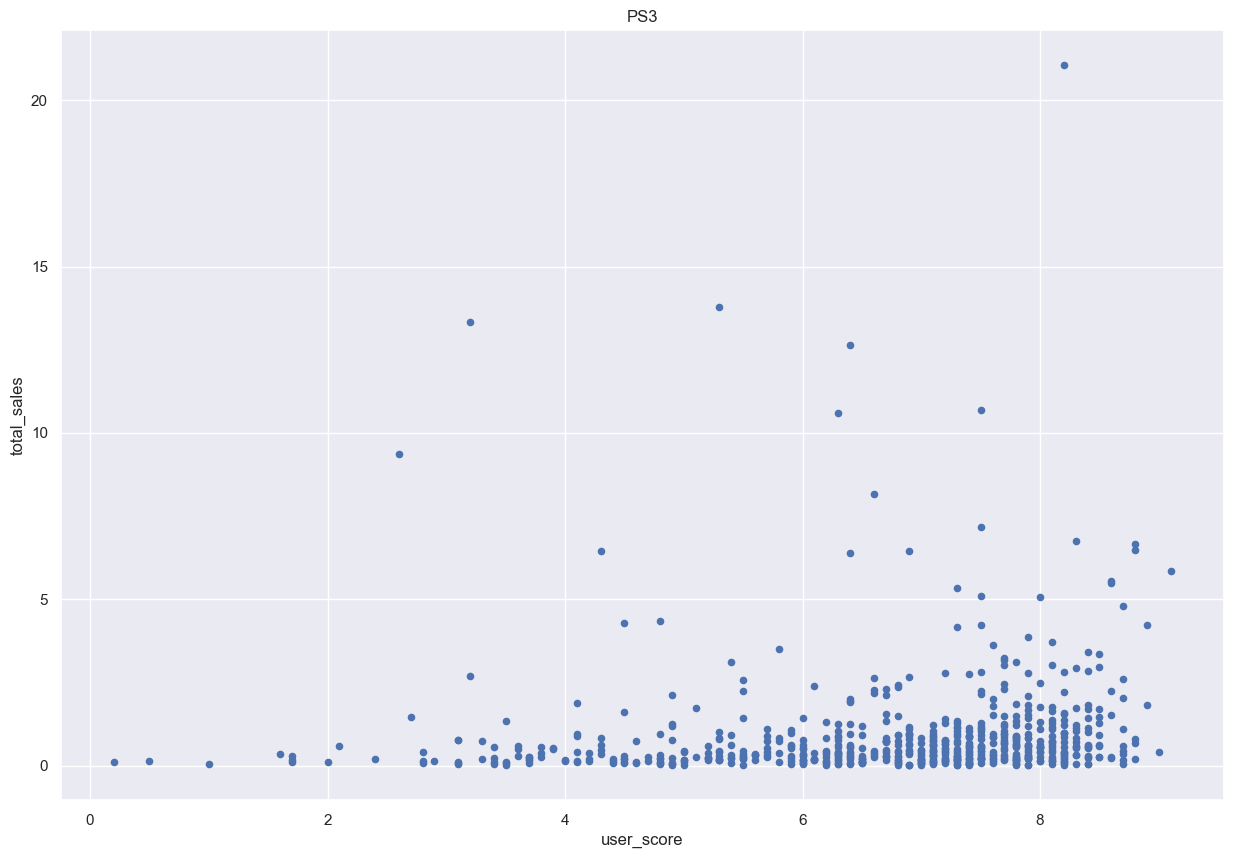

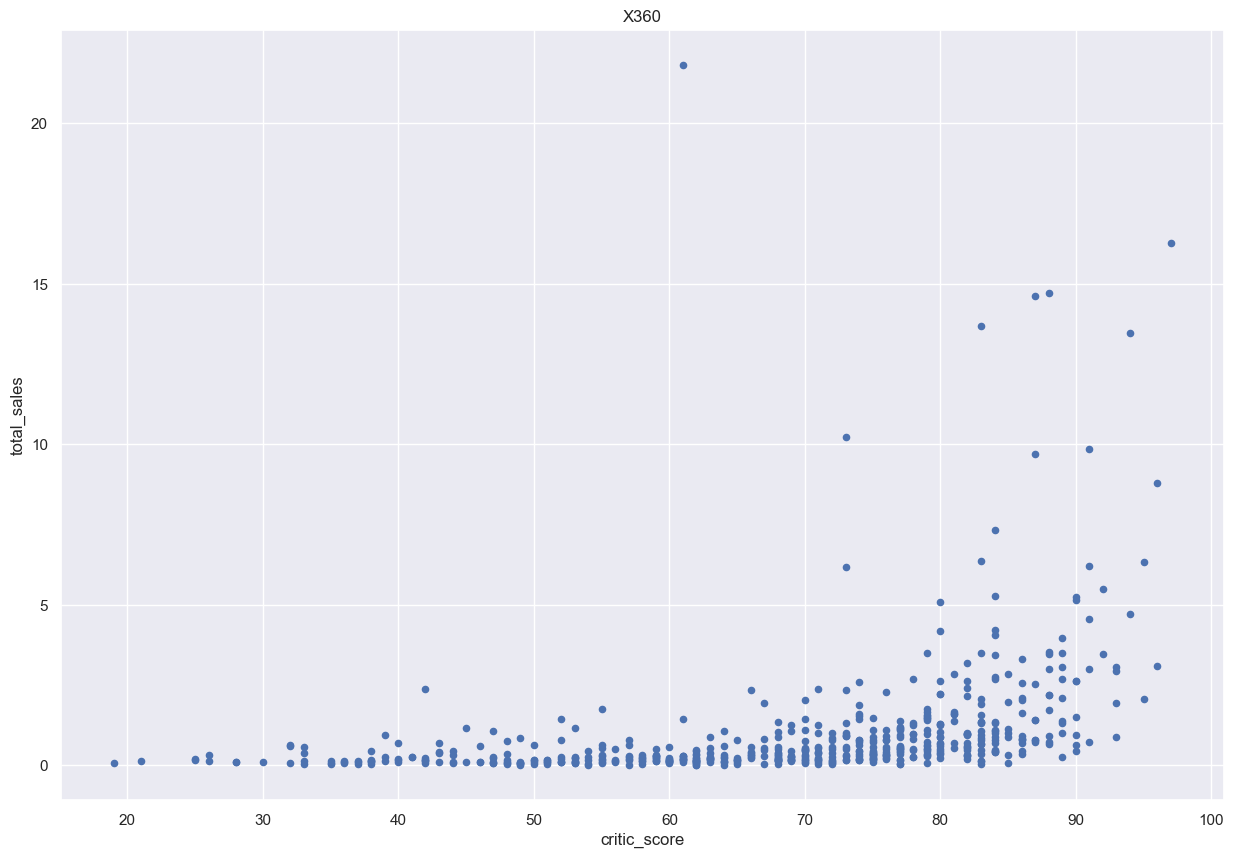

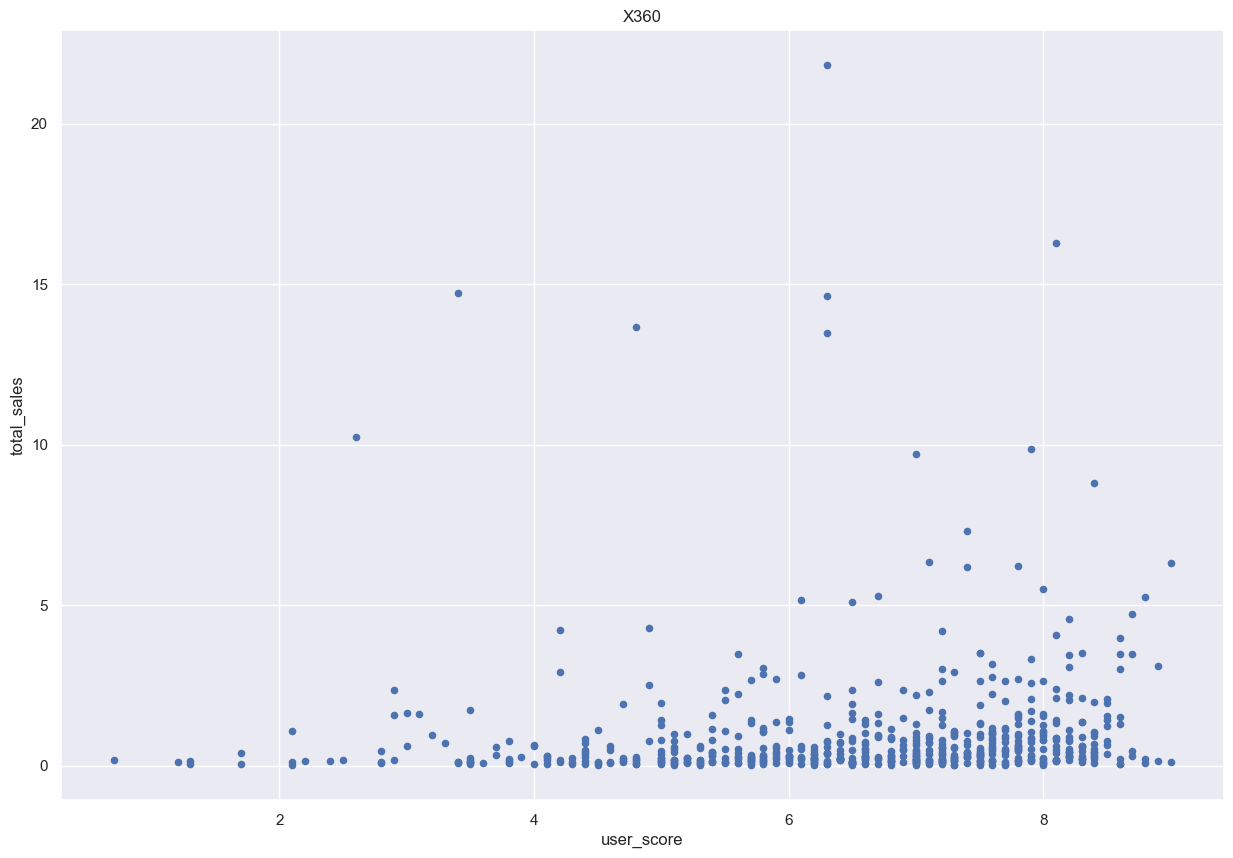

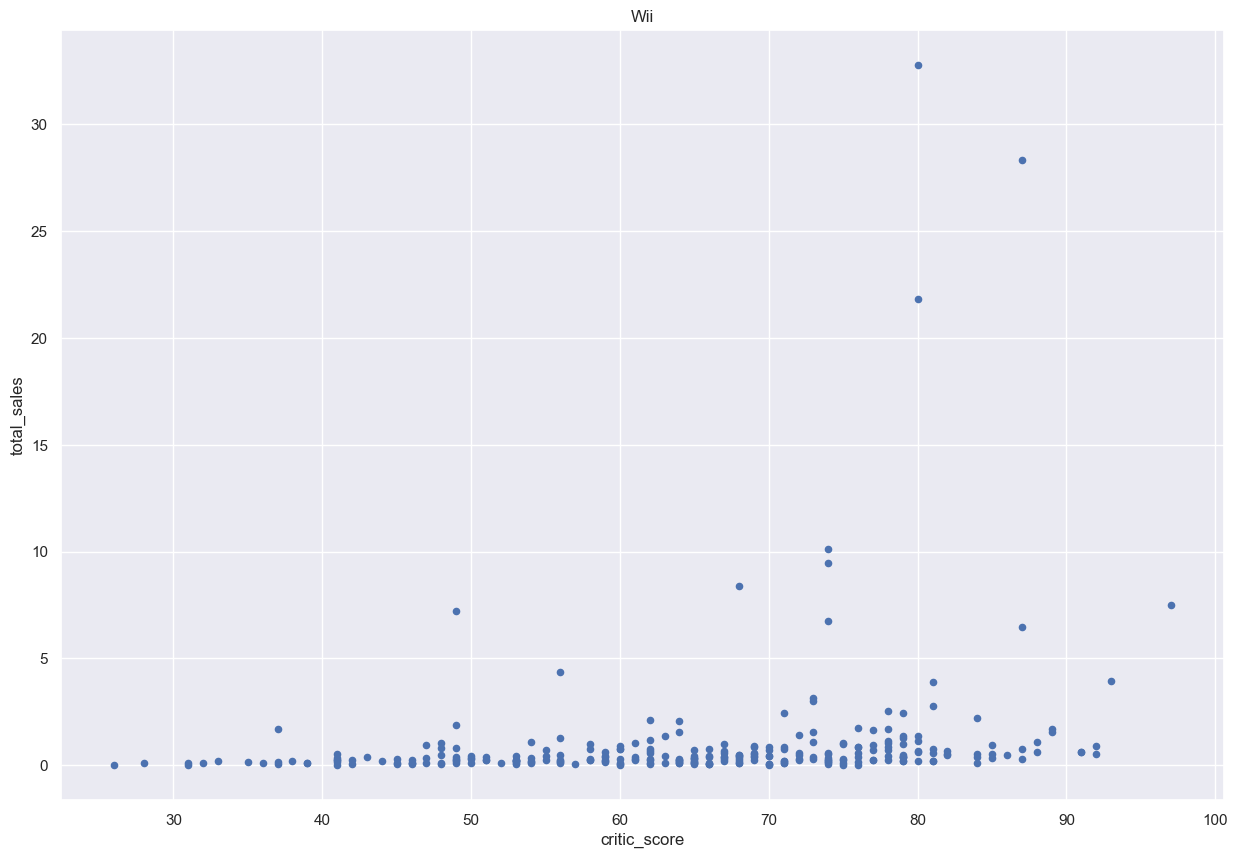

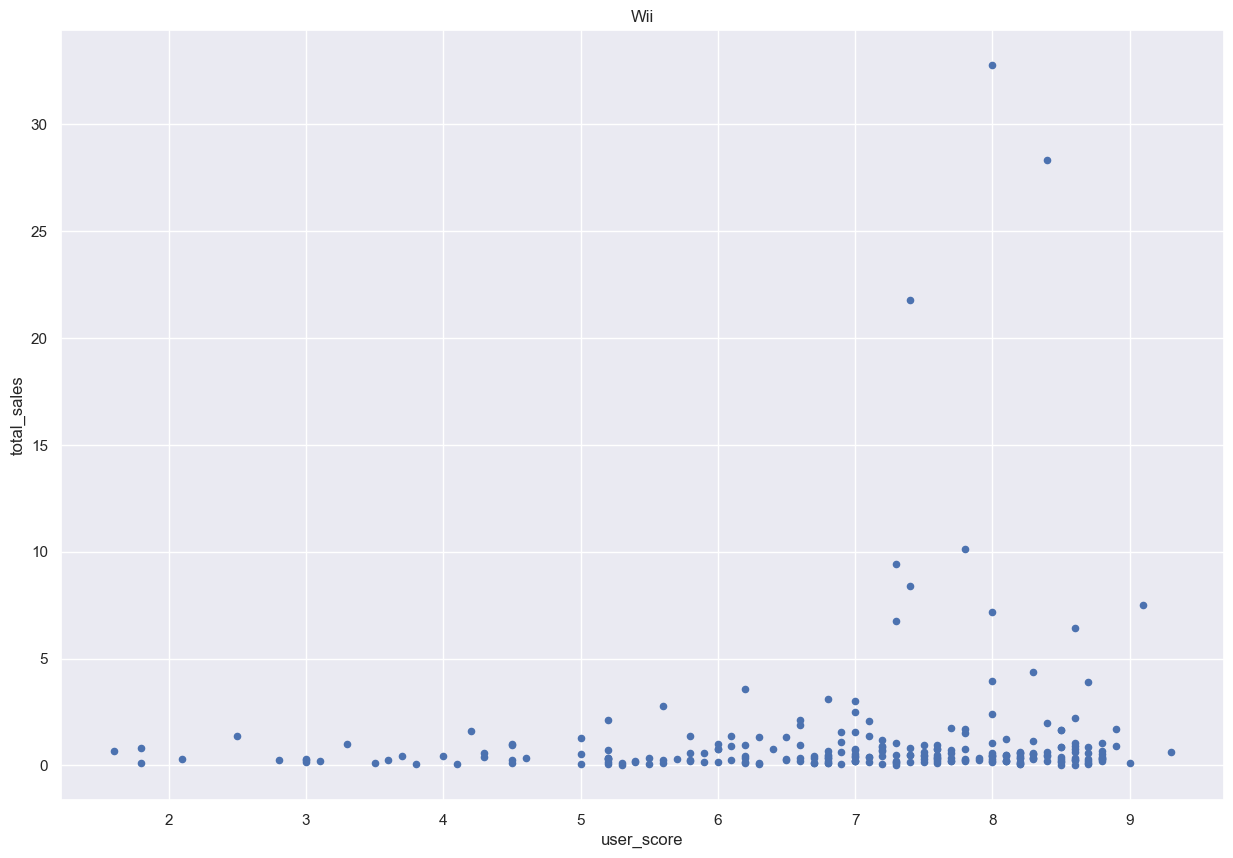

In [443]:
plataformas = ['PS4', 'WiiU', 'PS3', 'X360', 'Wii']

for plataforma in plataformas:
    correlacion(plataforma)

In [379]:
# distribución por género
juegos_genero = games2.groupby(['genre', 'name'])['total_sales'].sum().reset_index()

juegos_genero.query('1 < total_sales < 15', inplace=True)

print(juegos_genero)

         genre                              name  total_sales
7       Action       Ace Combat: Assault Horizon         1.23
17      Action                         Alan Wake         1.41
27      Action               Angry Birds Trilogy         1.05
40      Action               Assassin's Creed II        11.34
42      Action              Assassin's Creed III        13.01
...        ...                               ...          ...
4164  Strategy                          R.U.S.E.         1.02
4183  Strategy        Sid Meier's Civilization V         1.67
4188  Strategy  StarCraft II: Heart of the Swarm         1.67
4190  Strategy    StarCraft II: Wings of Liberty         4.83
4244  Strategy               XCOM: Enemy Unknown         1.90

[655 rows x 3 columns]


<Axes: xlabel='genre', ylabel='total_sales'>

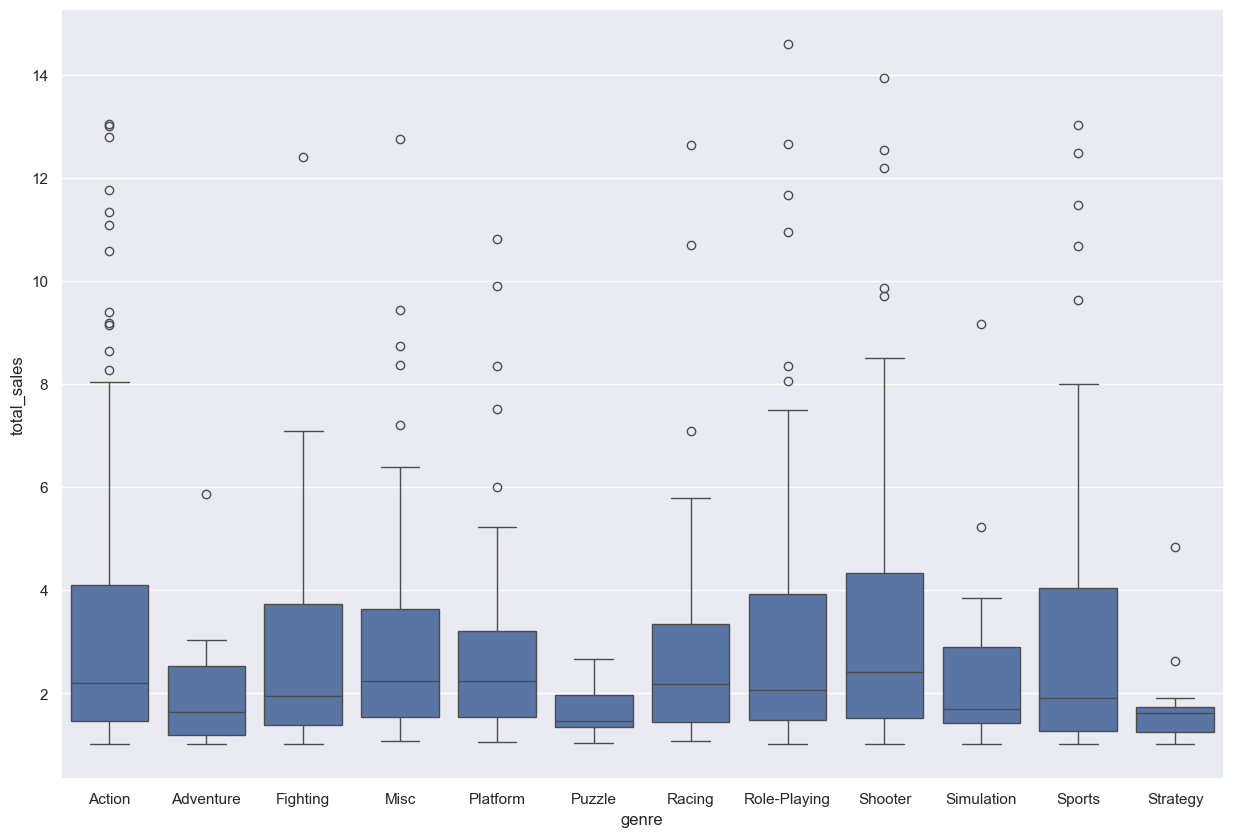

In [380]:
sns.boxplot(x='genre', y='total_sales', data=juegos_genero)

conclusion boxplot

In [401]:
# variaciones de marketshare, punto 4 - Norte América


na_platform= games2.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
print(na_platform)



   platform  na_sales
10     X360    408.18
4       PS3    291.90
8       Wii    235.75
1        DS    120.61
5       PS4    108.74
11     XOne     93.12
0       3DS     82.65
2        PC     40.49
9      WiiU     38.10
6       PSP     22.27
7       PSV     12.47
3       PS2     11.68


In [409]:
na_platform.sum()
print(na_platform.sum())
print()
na_platform['na_market_share']= na_platform['na_sales']*100 / na_platform.sum()['na_sales']
print(na_platform)

platform           X360PS3WiiDSPS4XOne3DSPCWiiUPSPPSVPS2
na_sales                                         1465.96
na_market_share                                      1.0
dtype: object

   platform  na_sales  na_market_share
10     X360    408.18        27.843870
4       PS3    291.90        19.911867
8       Wii    235.75        16.081612
1        DS    120.61         8.227373
5       PS4    108.74         7.417665
11     XOne     93.12         6.352151
0       3DS     82.65         5.637944
2        PC     40.49         2.762013
9      WiiU     38.10         2.598980
6       PSP     22.27         1.519141
7       PSV     12.47         0.850637
3       PS2     11.68         0.796748


In [415]:
eu_platform= games2.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)  # variaciones de marketshare, punto 4 - Europa

eu_platform.sum()
print(eu_platform.sum())
print()
eu_platform['eu_market_share']= eu_platform['eu_sales']*100 / eu_platform.sum()['eu_sales']
print(eu_platform)

platform    PS3X360PS4WiiPC3DSDSXOneWiiUPSPPSVPS2
eu_sales                                  1029.15
dtype: object

   platform  eu_sales  eu_market_share
4       PS3    255.00        24.777729
10     X360    196.72        19.114803
5       PS4    141.09        13.709372
8       Wii    124.22        12.070155
2        PC     82.32         7.998834
0       3DS     61.27         5.953457
1        DS     53.89         5.236360
11     XOne     51.59         5.012875
9      WiiU     25.13         2.441821
6       PSP     18.24         1.772336
7       PSV     13.07         1.269980
3       PS2      6.61         0.642278


In [421]:
jp_platform= games2.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False) # variaciones de marketshare, punto 4 - Japón

jp_platform.sum()
print(jp_platform.sum())
print()
jp_platform['jp_market_share']= jp_platform['jp_sales']*100 / jp_platform.sum()['jp_sales']
print(jp_platform)

platform    3DSPS3DSPSPWiiPSVPS4WiiUX360PS2XOnePC
jp_sales                                   367.03
dtype: object

   platform  jp_sales  jp_market_share
0       3DS    100.62        27.414653
4       PS3     68.29        18.606108
1        DS     52.11        14.197750
6       PSP     50.39        13.729123
8       Wii     34.32         9.350734
7       PSV     21.84         5.950467
5       PS4     15.96         4.348418
9      WiiU     13.01         3.544669
10     X360      7.41         2.018909
3       PS2      2.74         0.746533
11     XOne      0.34         0.092635
2        PC      0.00         0.000000


Conclusión ventas por país.

In [422]:
print('Norteamérica por género')
na_genre= games2.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)# variaciones de marketshare por género - Norte américa
na_platform.sum()
print(na_genre.sum())
print()
na_genre['na_market_share']= na_genre['na_sales']*100 / na_platform.sum()['na_sales']
print(na_genre)

print()
print('Europa por género')
eu_genre= games2.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)# variaciones de marketshare por género - Norte américa
eu_platform.sum()
print(eu_genre.sum())
print()
eu_genre['eu_market_share']= eu_genre['eu_sales']*100 / eu_platform.sum()['eu_sales']
print(eu_genre)

print()

print('Japón por género')
jp_genre= games2.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)# variaciones de marketshare por género - Norte américa
jp_platform.sum()
print(jp_genre.sum())
print()
jp_genre['jp_market_share']= jp_genre['jp_sales']*100 / jp_platform.sum()['jp_sales']
print(jp_genre)

Norteamérica por género
genre       ActionShooterSportsMiscRole-PlayingPlatformRac...
na_sales                                              1465.96
dtype: object

           genre  na_sales  na_market_share
0         Action    361.72        24.674616
8        Shooter    276.37        18.852493
10        Sports    227.66        15.529755
3           Misc    164.40        11.214494
7   Role-Playing    130.83         8.924527
4       Platform     74.93         5.111326
6         Racing     61.04         4.163824
2       Fighting     56.56         3.858223
9     Simulation     43.74         2.983710
1      Adventure     30.69         2.093509
5         Puzzle     20.19         1.377254
11      Strategy     17.83         1.216268

Europa por género
genre       ActionShooterSportsMiscRole-PlayingRacingPlatf...
eu_sales                                              1029.15
dtype: object

           genre  eu_sales  eu_market_share
0         Action    271.91        26.420833
8        Shooter   

In [466]:
# Correlación del rating con las ventas de plataformas por Región . Primero asigno valores numéricos a los valores de rating, según el modelo.

rating_map = {
    'E': 1,  # Everyone
    'T': 2,  # Teen
    'M': 3,  # Mature
    'AO': 4, # Adults Only
    'E10+': 5, # Everyone 10+
    'sin_clasificar': 6,  # Rating Pending
}


games2['rating_num'] = games['rating'].map(rating_map) # incorporar los ratings en el DataFrame con los valores numéricos
print(games2.head)

<bound method NDFrame.head of                                 name platform  year_of_release       genre  \
3                  Wii Sports Resort      Wii             2009      Sports   
8          New Super Mario Bros. Wii      Wii             2009    Platform   
14                Kinect Adventures!     X360             2010        Misc   
15                      Wii Fit Plus      Wii             2009      Sports   
16                Grand Theft Auto V      PS3             2013      Action   
...                              ...      ...              ...         ...   
16705                        15 Days       PC             2009   Adventure   
16707               Aiyoku no Eustia      PSV             2014        Misc   
16710  Samurai Warriors: Sanada Maru      PS3             2016      Action   
16712        Haitaka no Psychedelica      PSV             2016   Adventure   
16714            Winning Post 8 2016      PSV             2016  Simulation   

       na_sales  eu_sales  jp_sal

C:\Users\isaacfraustro\AppData\Local\Temp\ipykernel_13296\2886433933.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games2['rating_num'] = games['rating'].map(rating_map) # incorporar los ratings en el DataFrame con los valores numéricos


Conclusiones por género.


In [471]:

# Correlación entre Rating_num y ventas en NA, EU, JP
corr_na = games2['na_sales'].corr(games2['rating_num'])
corr_eu = games2['eu_sales'].corr(games2['rating_num'])
corr_jp = games2['jp_sales'].corr(games2['rating_num'])

print(f"Correlación Norte America vs Rating: {corr_na}")
print(f"Correlación Europa vs Rating: {corr_eu}")
print(f"Correlación Japon vs Rating: {corr_jp}")

Correlación Norte America vs Rating: 0.015671854802330843
Correlación Europa vs Rating: 0.012136137674147281
Correlación Japon vs Rating: -0.033865354703913435


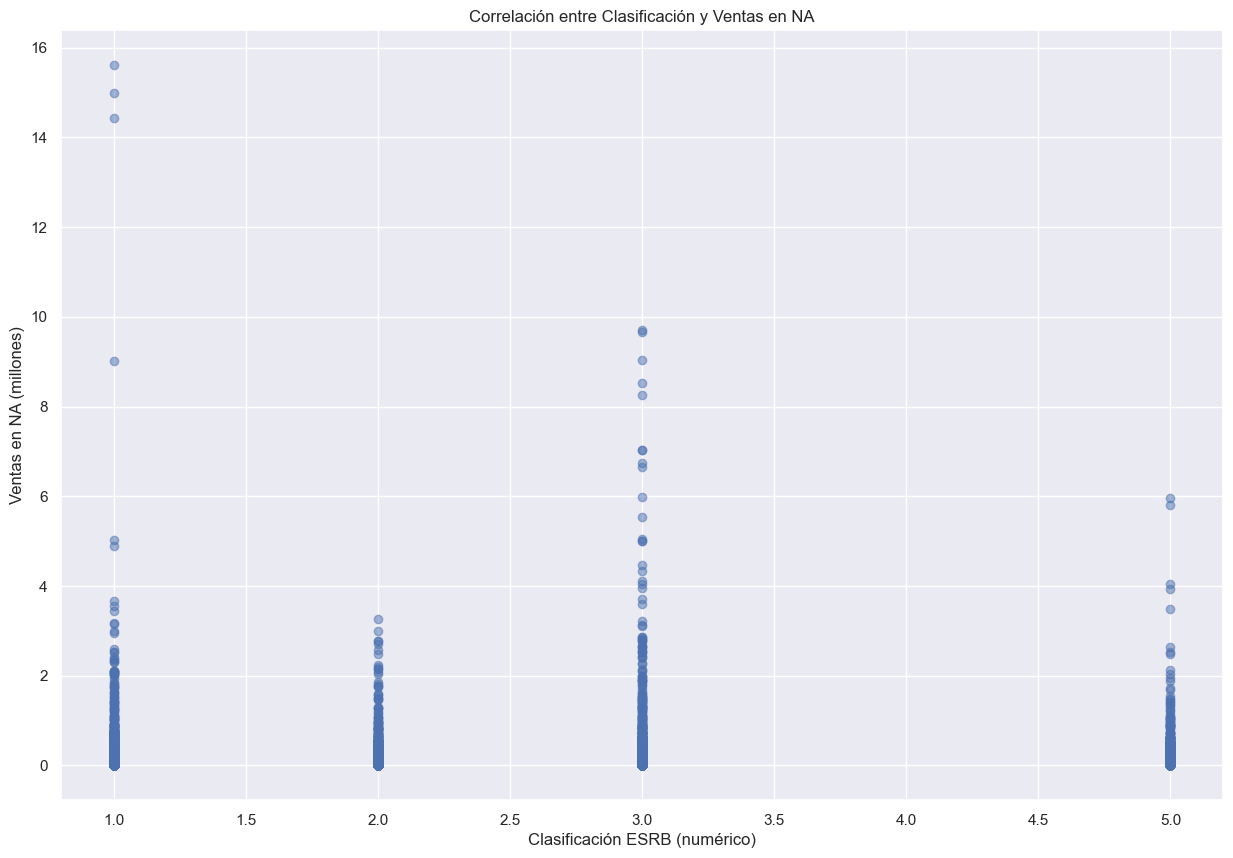

In [472]:
import matplotlib.pyplot as plt

# Gráfico de dispersión para NA
plt.scatter(games2['rating_num'], games2['na_sales'], alpha=0.5)
plt.title('Correlación entre Clasificación y Ventas en NA')
plt.xlabel('Clasificación ESRB (numérico)')
plt.ylabel('Ventas en NA (millones)')
plt.show()

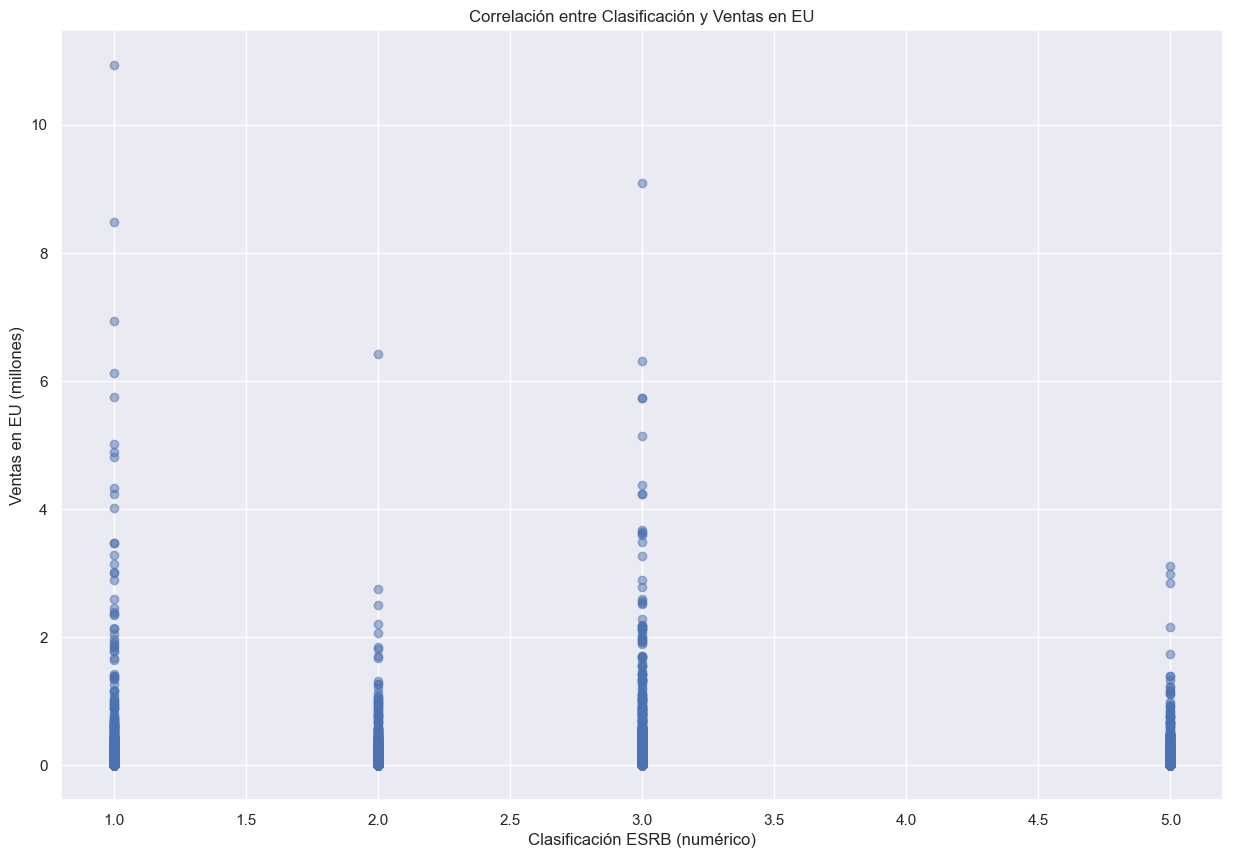

In [473]:
# Gráfico de dispersión para EU
plt.scatter(games2['rating_num'], games2['eu_sales'], alpha=0.5)
plt.title('Correlación entre Clasificación y Ventas en EU')
plt.xlabel('Clasificación ESRB (numérico)')
plt.ylabel('Ventas en EU (millones)')
plt.show()

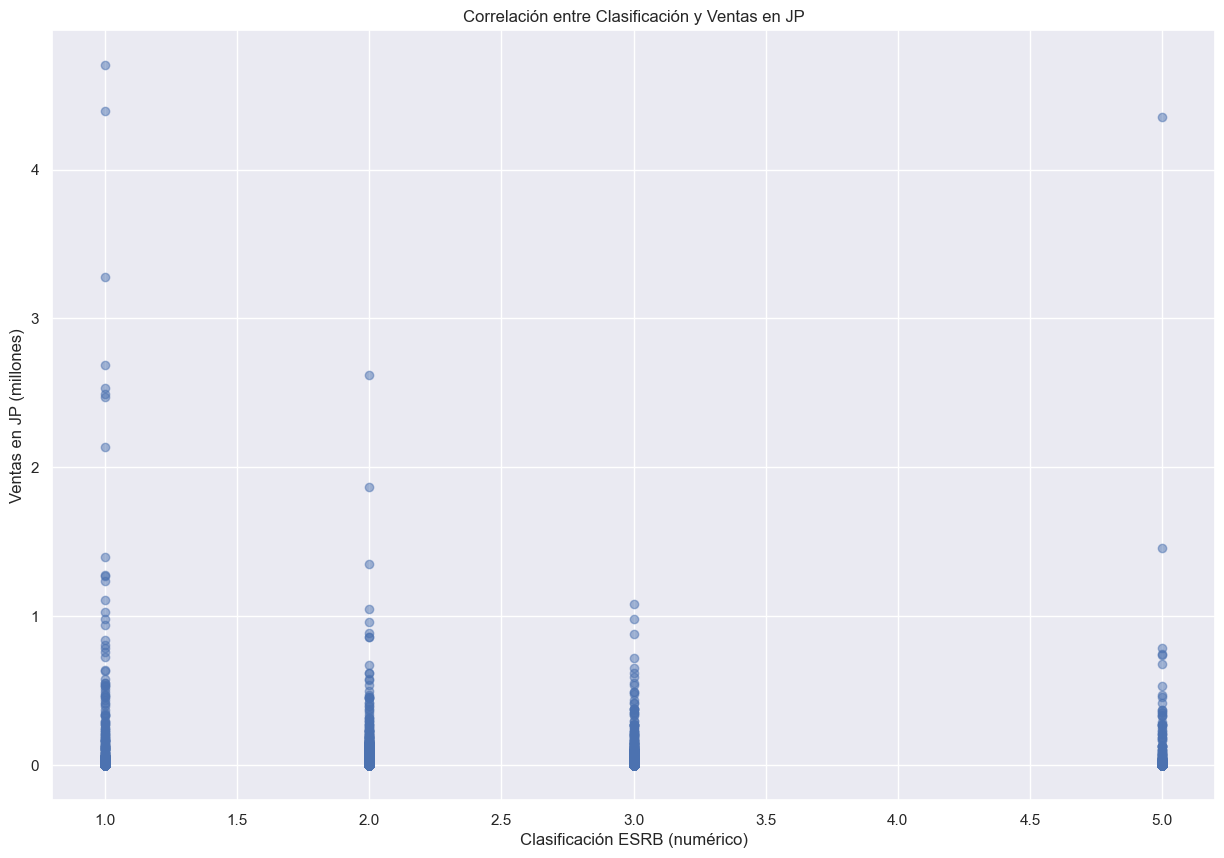

In [474]:
# Gráfico de dispersión para JP
plt.scatter(games2['rating_num'], games2['jp_sales'], alpha=0.5)
plt.title('Correlación entre Clasificación y Ventas en JP')
plt.xlabel('Clasificación ESRB (numérico)')
plt.ylabel('Ventas en JP (millones)')
plt.show()

Conclusión de correlación de ventas vs clasificación de juegos:   No existe una correlación fuerte que indique que depende del rating es la cantidad de ventas del videojuego, para ninguna de las 3 regiones.